In [1]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
import seaborn as sns

from multi_imbalance.resampling.global_cs import GlobalCS


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'balance-scale'
test_on_all_folds = True
test_all_ds = True

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1),
            "QDA": QuadraticDiscriminantAnalysis(),
            "LDA": LinearDiscriminantAnalysis()
        } 
    return classifiers

In [6]:
from experiment import dt_name_to_cols_to_encode

In [7]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

cmc


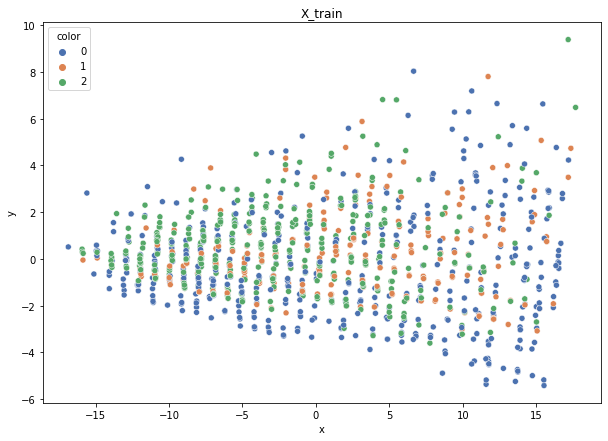

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.441
DT-f1-old-features: 0.469
DT-gmean-GlobalCS: 0.437
DT-gmean-old-features: 0.467
KNN-f1-GlobalCS: 0.415
KNN-f1-old-features: 0.431
KNN-gmean-GlobalCS: 0.411
KNN-gmean-old-features: 0.425
LDA-f1-GlobalCS: 0.48
LDA-f1-old-features: 0.482
LDA-gmean-GlobalCS: 0.492
LDA-gmean-old-features: 0.47
QDA-f1-GlobalCS: 0.468
QDA-f1-old-features: 0.483
QDA-gmean-GlobalCS: 0.482
QDA-gmean-old-features: 0.496
RF24-f1-GlobalCS: 0.479
RF24-f1-old-features: 0.519
RF24-gmean-GlobalCS: 0.485
RF24-gmean-old-features: 0.523


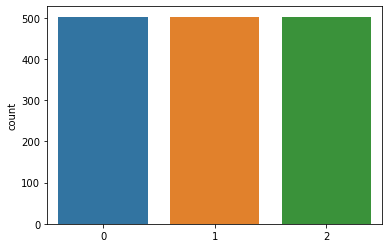

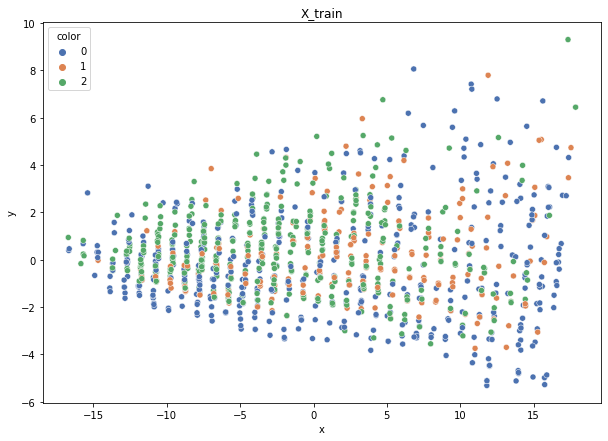

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.438
DT-f1-old-features: 0.491
DT-gmean-GlobalCS: 0.439
DT-gmean-old-features: 0.503
KNN-f1-GlobalCS: 0.404
KNN-f1-old-features: 0.443
KNN-gmean-GlobalCS: 0.392
KNN-gmean-old-features: 0.433
LDA-f1-GlobalCS: 0.508
LDA-f1-old-features: 0.501
LDA-gmean-GlobalCS: 0.521
LDA-gmean-old-features: 0.49
QDA-f1-GlobalCS: 0.424
QDA-f1-old-features: 0.513
QDA-gmean-GlobalCS: 0.434
QDA-gmean-old-features: 0.528
RF24-f1-GlobalCS: 0.505
RF24-f1-old-features: 0.508
RF24-gmean-GlobalCS: 0.508
RF24-gmean-old-features: 0.512


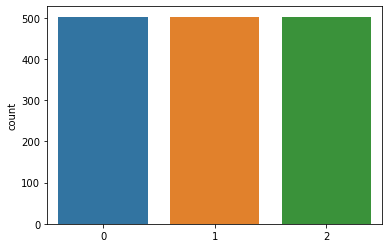

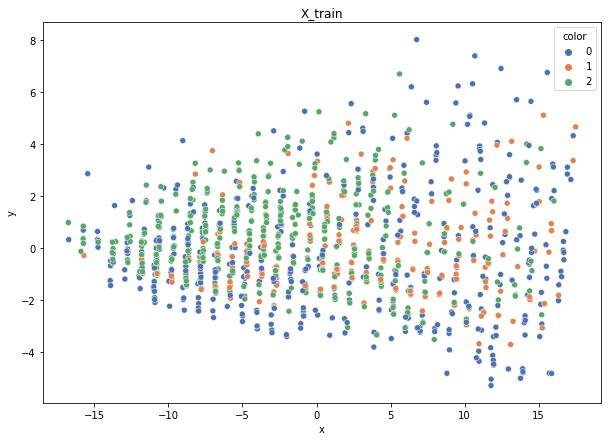

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.508
DT-f1-old-features: 0.462
DT-gmean-GlobalCS: 0.508
DT-gmean-old-features: 0.46
KNN-f1-GlobalCS: 0.412
KNN-f1-old-features: 0.413
KNN-gmean-GlobalCS: 0.407
KNN-gmean-old-features: 0.399
LDA-f1-GlobalCS: 0.465
LDA-f1-old-features: 0.447
LDA-gmean-GlobalCS: 0.475
LDA-gmean-old-features: 0.425
QDA-f1-GlobalCS: 0.444
QDA-f1-old-features: 0.486
QDA-gmean-GlobalCS: 0.46
QDA-gmean-old-features: 0.493
RF24-f1-GlobalCS: 0.479
RF24-f1-old-features: 0.519
RF24-gmean-GlobalCS: 0.468
RF24-gmean-old-features: 0.513


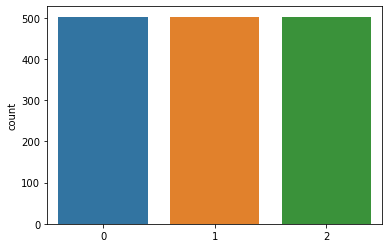

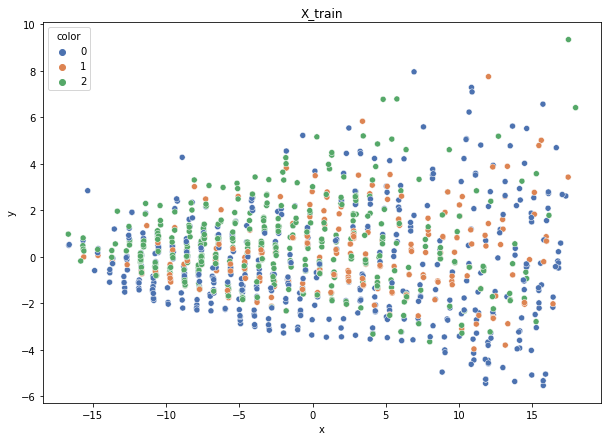

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.389
DT-f1-old-features: 0.44
DT-gmean-GlobalCS: 0.372
DT-gmean-old-features: 0.438
KNN-f1-GlobalCS: 0.411
KNN-f1-old-features: 0.418
KNN-gmean-GlobalCS: 0.41
KNN-gmean-old-features: 0.413
LDA-f1-GlobalCS: 0.512
LDA-f1-old-features: 0.485
LDA-gmean-GlobalCS: 0.52
LDA-gmean-old-features: 0.451
QDA-f1-GlobalCS: 0.44
QDA-f1-old-features: 0.516
QDA-gmean-GlobalCS: 0.454
QDA-gmean-old-features: 0.524
RF24-f1-GlobalCS: 0.488
RF24-f1-old-features: 0.509
RF24-gmean-GlobalCS: 0.482
RF24-gmean-old-features: 0.497


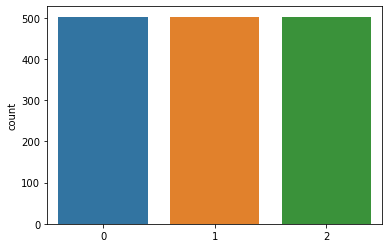

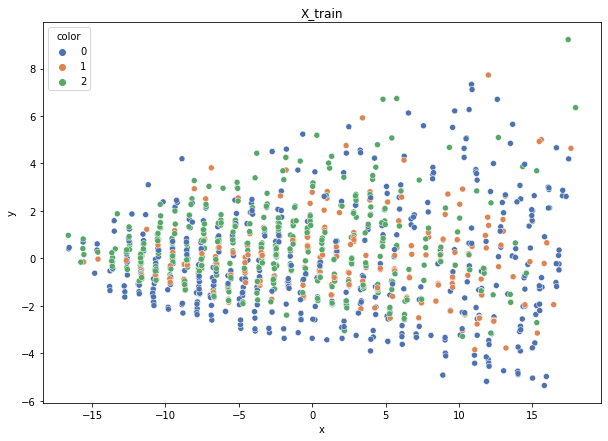

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.466
DT-f1-old-features: 0.473
DT-gmean-GlobalCS: 0.468
DT-gmean-old-features: 0.483
KNN-f1-GlobalCS: 0.404
KNN-f1-old-features: 0.408
KNN-gmean-GlobalCS: 0.401
KNN-gmean-old-features: 0.394
LDA-f1-GlobalCS: 0.522
LDA-f1-old-features: 0.527
LDA-gmean-GlobalCS: 0.538
LDA-gmean-old-features: 0.509
QDA-f1-GlobalCS: 0.477
QDA-f1-old-features: 0.542
QDA-gmean-GlobalCS: 0.49
QDA-gmean-old-features: 0.557
RF24-f1-GlobalCS: 0.505
RF24-f1-old-features: 0.515
RF24-gmean-GlobalCS: 0.512
RF24-gmean-old-features: 0.518
dermatology


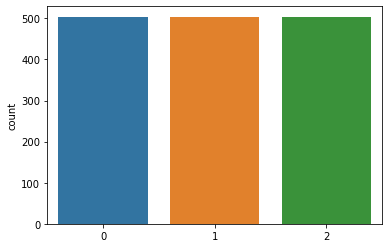

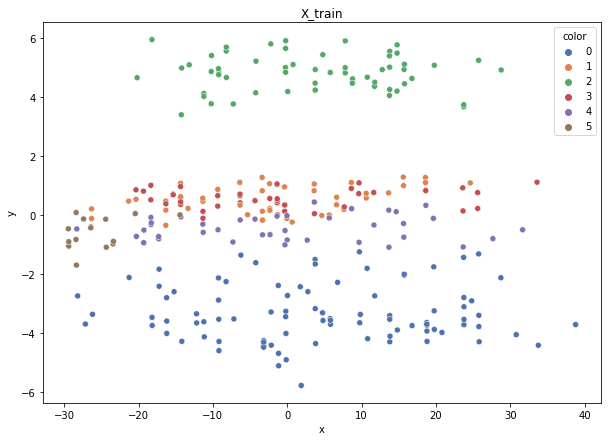

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.803
DT-f1-old-features: 0.914
DT-gmean-GlobalCS: 0.805
DT-gmean-old-features: 0.911
KNN-f1-GlobalCS: 0.869
KNN-f1-old-features: 0.944
KNN-gmean-GlobalCS: 0.873
KNN-gmean-old-features: 0.941
LDA-f1-GlobalCS: 0.922
LDA-f1-old-features: 0.943
LDA-gmean-GlobalCS: 0.922
LDA-gmean-old-features: 0.942
QDA-f1-GlobalCS: 0.892
QDA-f1-old-features: 0.749
QDA-gmean-GlobalCS: 0.895
QDA-gmean-old-features: 0.74
RF24-f1-GlobalCS: 0.915
RF24-f1-old-features: 0.959
RF24-gmean-GlobalCS: 0.906
RF24-gmean-old-features: 0.957


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


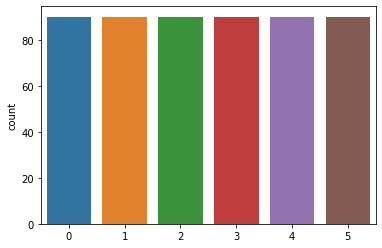

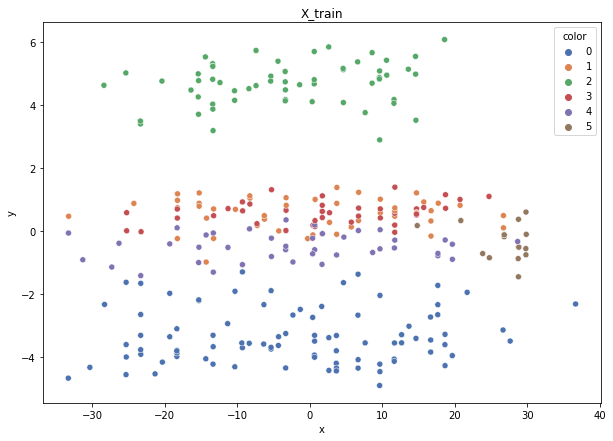

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.885
DT-f1-old-features: 0.955
DT-gmean-GlobalCS: 0.9
DT-gmean-old-features: 0.955
KNN-f1-GlobalCS: 0.92
KNN-f1-old-features: 0.952
KNN-gmean-GlobalCS: 0.925
KNN-gmean-old-features: 0.951
LDA-f1-GlobalCS: 0.955
LDA-f1-old-features: 0.968
LDA-gmean-GlobalCS: 0.958
LDA-gmean-old-features: 0.97
QDA-f1-GlobalCS: 0.858
QDA-f1-old-features: 0.786
QDA-gmean-GlobalCS: 0.871
QDA-gmean-old-features: 0.766
RF24-f1-GlobalCS: 0.952
RF24-f1-old-features: 0.984
RF24-gmean-GlobalCS: 0.953
RF24-gmean-old-features: 0.986


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


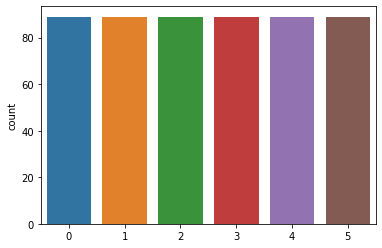

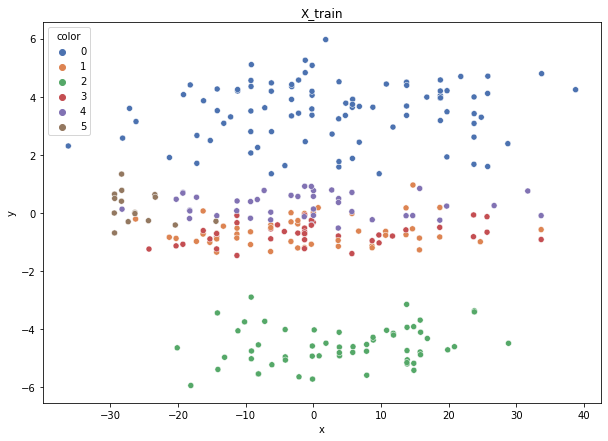

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.931
DT-f1-old-features: 0.945
DT-gmean-GlobalCS: 0.941
DT-gmean-old-features: 0.953
KNN-f1-GlobalCS: 0.875
KNN-f1-old-features: 0.906
KNN-gmean-GlobalCS: 0.89
KNN-gmean-old-features: 0.891
LDA-f1-GlobalCS: 0.943
LDA-f1-old-features: 0.922
LDA-gmean-GlobalCS: 0.95
LDA-gmean-old-features: 0.913
QDA-f1-GlobalCS: 0.845
QDA-f1-old-features: 0.865
QDA-gmean-GlobalCS: 0.794
QDA-gmean-old-features: 0.861
RF24-f1-GlobalCS: 0.952
RF24-f1-old-features: 0.909
RF24-gmean-GlobalCS: 0.947
RF24-gmean-old-features: 0.905


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


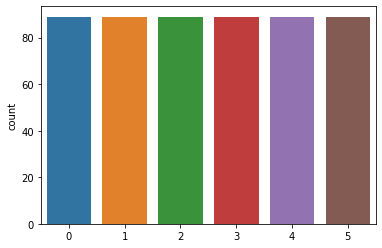

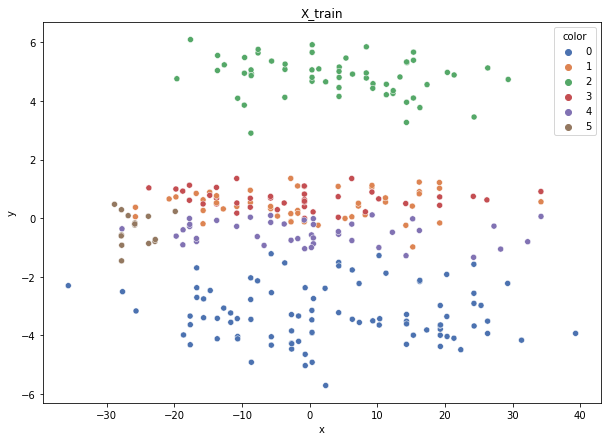

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.872
DT-f1-old-features: 0.946
DT-gmean-GlobalCS: 0.875
DT-gmean-old-features: 0.945
KNN-f1-GlobalCS: 0.901
KNN-f1-old-features: 0.939
KNN-gmean-GlobalCS: 0.901
KNN-gmean-old-features: 0.937
LDA-f1-GlobalCS: 0.969
LDA-f1-old-features: 0.969
LDA-gmean-GlobalCS: 0.968
LDA-gmean-old-features: 0.968
QDA-f1-GlobalCS: 0.858
QDA-f1-old-features: 0.652
QDA-gmean-GlobalCS: 0.859
QDA-gmean-old-features: 0.553
RF24-f1-GlobalCS: 0.95
RF24-f1-old-features: 0.969
RF24-gmean-GlobalCS: 0.942
RF24-gmean-old-features: 0.963


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


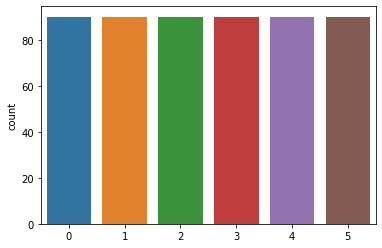

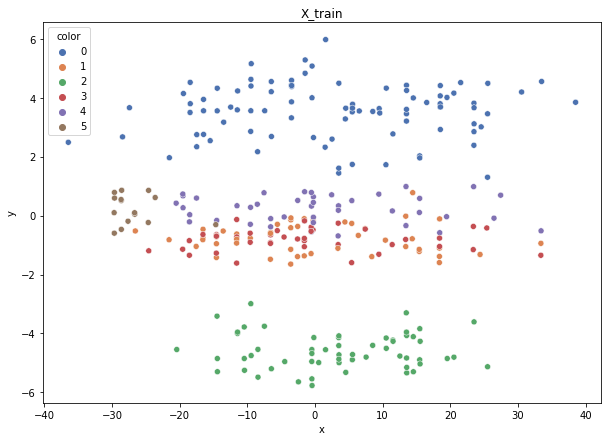

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.709
DT-f1-old-features: 0.989
DT-gmean-GlobalCS: 0.722
DT-gmean-old-features: 0.992
KNN-f1-GlobalCS: 0.891
KNN-f1-old-features: 0.944
KNN-gmean-GlobalCS: 0.871
KNN-gmean-old-features: 0.942
LDA-f1-GlobalCS: 1.0
LDA-f1-old-features: 0.989
LDA-gmean-GlobalCS: 1.0
LDA-gmean-old-features: 0.992
QDA-f1-GlobalCS: 0.962
QDA-f1-old-features: 0.835
QDA-gmean-GlobalCS: 0.978
QDA-gmean-old-features: 0.814
RF24-f1-GlobalCS: 0.985
RF24-f1-old-features: 1.0
RF24-gmean-GlobalCS: 0.983
RF24-gmean-old-features: 1.0
hayes-roth


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


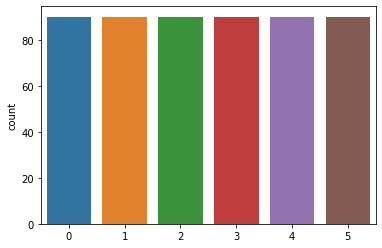

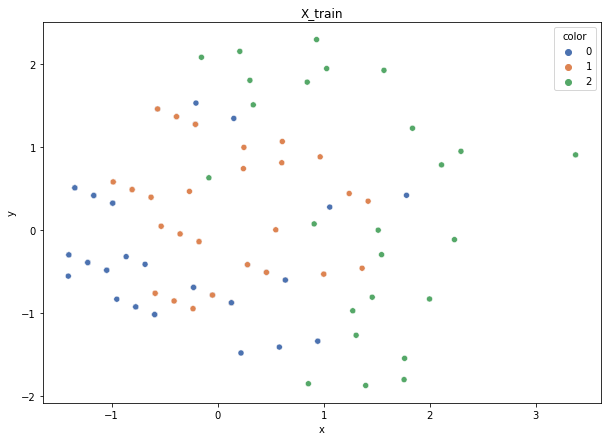

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.897
DT-f1-old-features: 0.842
DT-gmean-GlobalCS: 0.892
DT-gmean-old-features: 0.828
KNN-f1-GlobalCS: 0.842
KNN-f1-old-features: 0.733
KNN-gmean-GlobalCS: 0.828
KNN-gmean-old-features: 0.688
LDA-f1-GlobalCS: 0.832
LDA-f1-old-features: 0.57
LDA-gmean-GlobalCS: 0.816
LDA-gmean-old-features: 0.549
QDA-f1-GlobalCS: 0.193
QDA-f1-old-features: 0.58
QDA-gmean-GlobalCS: 0.01
QDA-gmean-old-features: 0.574
RF24-f1-GlobalCS: 0.872
RF24-f1-old-features: 0.838
RF24-gmean-GlobalCS: 0.867
RF24-gmean-old-features: 0.814


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


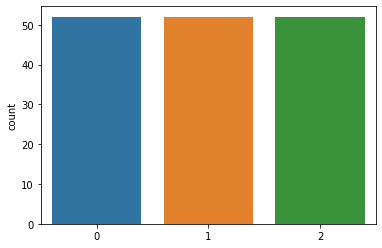

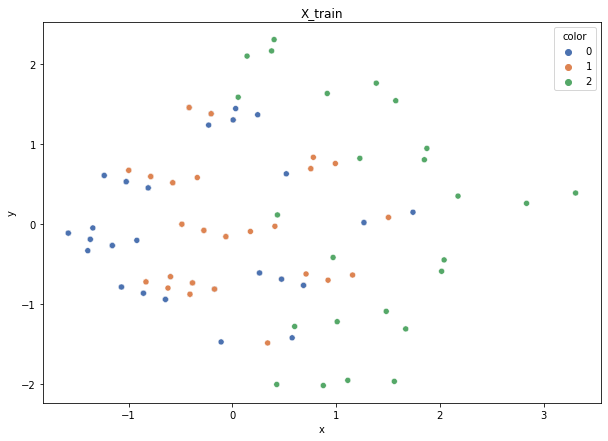

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.872
DT-f1-old-features: 0.872
DT-gmean-GlobalCS: 0.867
DT-gmean-old-features: 0.867
KNN-f1-GlobalCS: 0.872
KNN-f1-old-features: 0.643
KNN-gmean-GlobalCS: 0.867
KNN-gmean-old-features: 0.619
LDA-f1-GlobalCS: 0.857
LDA-f1-old-features: 0.439
LDA-gmean-GlobalCS: 0.84
LDA-gmean-old-features: 0.414
QDA-f1-GlobalCS: 0.105
QDA-f1-old-features: 0.54
QDA-gmean-GlobalCS: 0.01
QDA-gmean-old-features: 0.529
RF24-f1-GlobalCS: 0.818
RF24-f1-old-features: 0.846
RF24-gmean-GlobalCS: 0.805
RF24-gmean-old-features: 0.84


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


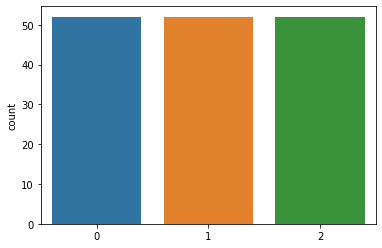

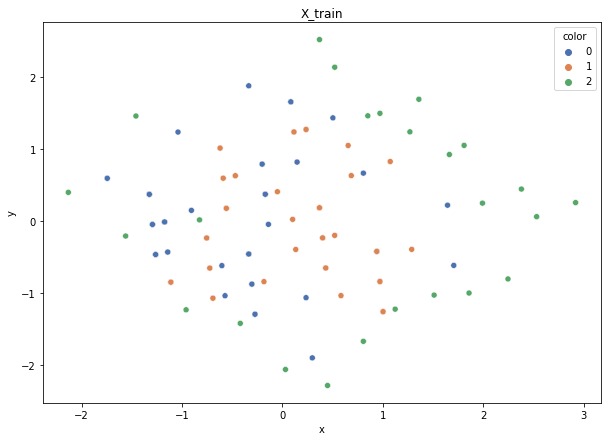

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.897
DT-f1-old-features: 0.923
DT-gmean-GlobalCS: 0.892
DT-gmean-old-features: 0.921
KNN-f1-GlobalCS: 0.897
KNN-f1-old-features: 0.836
KNN-gmean-GlobalCS: 0.892
KNN-gmean-old-features: 0.805
LDA-f1-GlobalCS: 0.923
LDA-f1-old-features: 0.565
LDA-gmean-GlobalCS: 0.921
LDA-gmean-old-features: 0.474
QDA-f1-GlobalCS: 0.105
QDA-f1-old-features: 0.666
QDA-gmean-GlobalCS: 0.01
QDA-gmean-old-features: 0.643
RF24-f1-GlobalCS: 0.922
RF24-f1-old-features: 0.923
RF24-gmean-GlobalCS: 0.916
RF24-gmean-old-features: 0.921


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


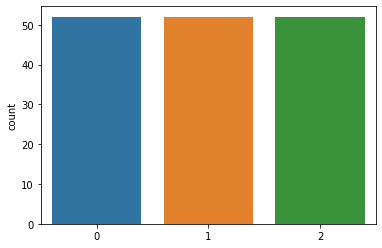

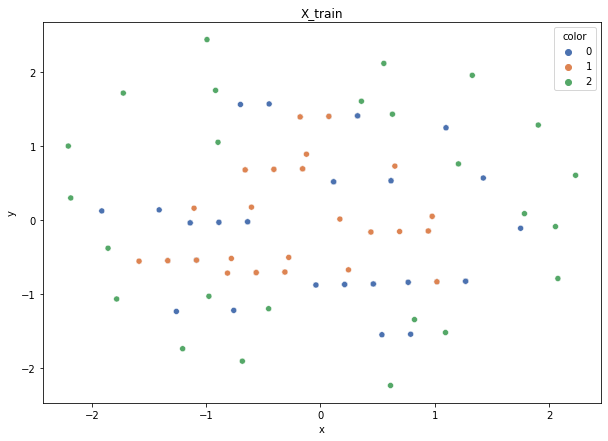

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.87
DT-f1-old-features: 0.897
DT-gmean-GlobalCS: 0.861
DT-gmean-old-features: 0.892
KNN-f1-GlobalCS: 0.744
KNN-f1-old-features: 0.594
KNN-gmean-GlobalCS: 0.723
KNN-gmean-old-features: 0.54
LDA-f1-GlobalCS: 0.897
LDA-f1-old-features: 0.615
LDA-gmean-GlobalCS: 0.892
LDA-gmean-old-features: 0.605
QDA-f1-GlobalCS: 0.105
QDA-f1-old-features: 0.739
QDA-gmean-GlobalCS: 0.01
QDA-gmean-old-features: 0.752
RF24-f1-GlobalCS: 0.87
RF24-f1-old-features: 0.923
RF24-gmean-GlobalCS: 0.861
RF24-gmean-old-features: 0.921


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


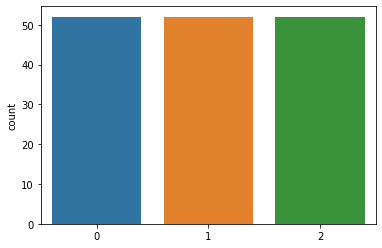

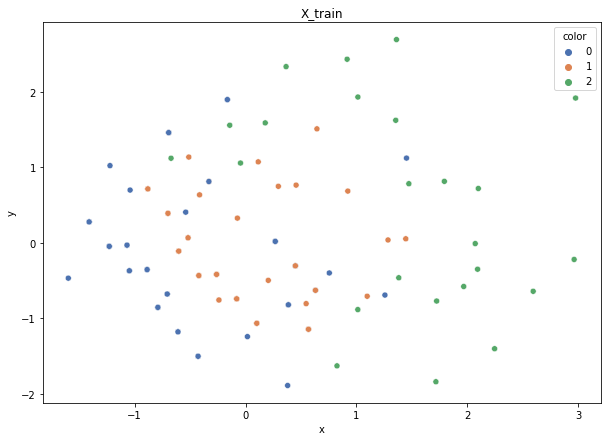

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.808
DT-f1-old-features: 0.722
DT-gmean-GlobalCS: 0.79
DT-gmean-old-features: 0.684
KNN-f1-GlobalCS: 0.729
KNN-f1-old-features: 0.555
KNN-gmean-GlobalCS: 0.702
KNN-gmean-old-features: 0.529
LDA-f1-GlobalCS: 0.784
LDA-f1-old-features: 0.607
LDA-gmean-GlobalCS: 0.766
LDA-gmean-old-features: 0.591
QDA-f1-GlobalCS: 0.12
QDA-f1-old-features: 0.663
QDA-gmean-GlobalCS: 0.01
QDA-gmean-old-features: 0.667
RF24-f1-GlobalCS: 0.792
RF24-f1-old-features: 0.733
RF24-gmean-GlobalCS: 0.747
RF24-gmean-old-features: 0.711
new_vehicle


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


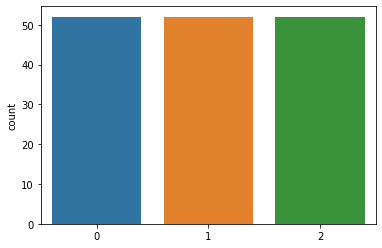

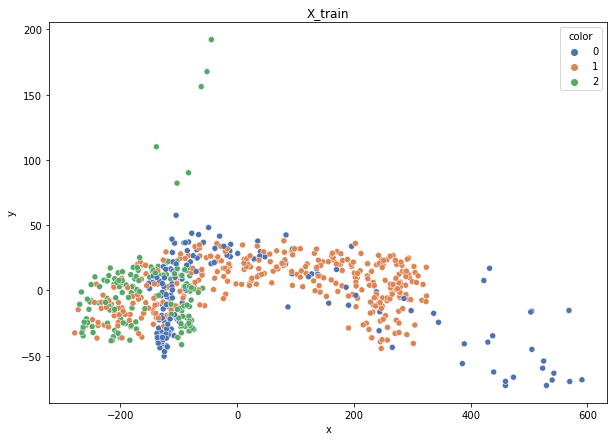

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.876
DT-f1-old-features: 0.901
DT-gmean-GlobalCS: 0.874
DT-gmean-old-features: 0.908
KNN-f1-GlobalCS: 0.889
KNN-f1-old-features: 0.889
KNN-gmean-GlobalCS: 0.895
KNN-gmean-old-features: 0.895
LDA-f1-GlobalCS: 0.891
LDA-f1-old-features: 0.907
LDA-gmean-GlobalCS: 0.916
LDA-gmean-old-features: 0.921
QDA-f1-GlobalCS: 0.932
QDA-f1-old-features: 0.932
QDA-gmean-GlobalCS: 0.944
QDA-gmean-old-features: 0.944
RF24-f1-GlobalCS: 0.922
RF24-f1-old-features: 0.922
RF24-gmean-GlobalCS: 0.935
RF24-gmean-old-features: 0.932


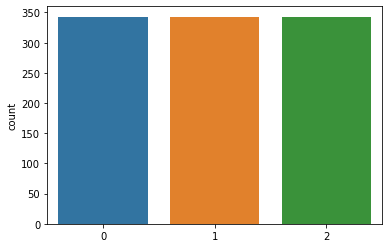

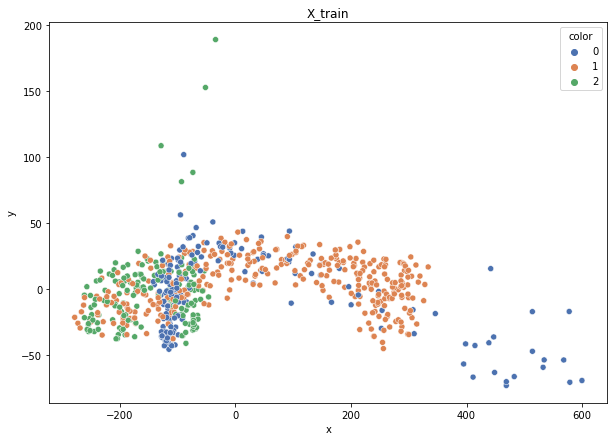

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.902
DT-f1-old-features: 0.906
DT-gmean-GlobalCS: 0.909
DT-gmean-old-features: 0.904
KNN-f1-GlobalCS: 0.9
KNN-f1-old-features: 0.9
KNN-gmean-GlobalCS: 0.908
KNN-gmean-old-features: 0.908
LDA-f1-GlobalCS: 0.928
LDA-f1-old-features: 0.933
LDA-gmean-GlobalCS: 0.947
LDA-gmean-old-features: 0.94
QDA-f1-GlobalCS: 0.982
QDA-f1-old-features: 0.988
QDA-gmean-GlobalCS: 0.988
QDA-gmean-old-features: 0.992
RF24-f1-GlobalCS: 0.959
RF24-f1-old-features: 0.958
RF24-gmean-GlobalCS: 0.972
RF24-gmean-old-features: 0.968


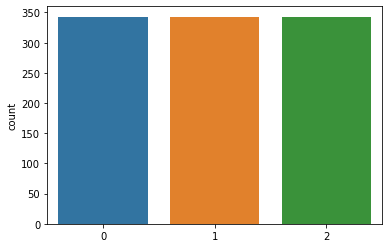

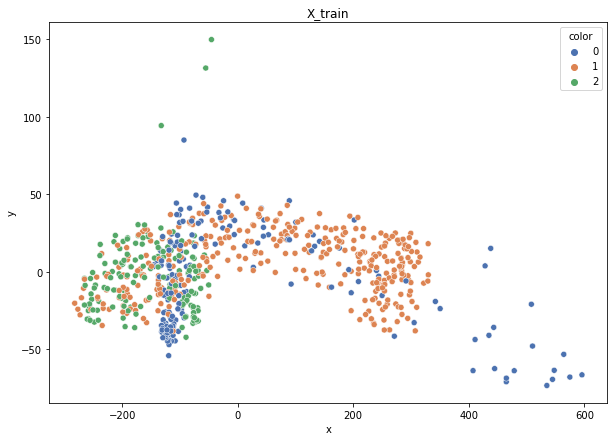

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.883
DT-f1-old-features: 0.89
DT-gmean-GlobalCS: 0.881
DT-gmean-old-features: 0.895
KNN-f1-GlobalCS: 0.899
KNN-f1-old-features: 0.899
KNN-gmean-GlobalCS: 0.897
KNN-gmean-old-features: 0.897
LDA-f1-GlobalCS: 0.935
LDA-f1-old-features: 0.965
LDA-gmean-GlobalCS: 0.944
LDA-gmean-old-features: 0.964
QDA-f1-GlobalCS: 0.982
QDA-f1-old-features: 0.976
QDA-gmean-GlobalCS: 0.984
QDA-gmean-old-features: 0.975
RF24-f1-GlobalCS: 0.964
RF24-f1-old-features: 0.952
RF24-gmean-GlobalCS: 0.968
RF24-gmean-old-features: 0.955


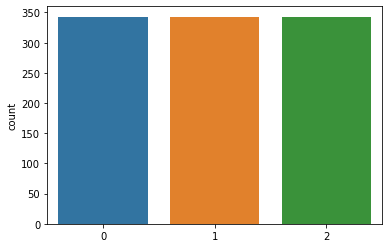

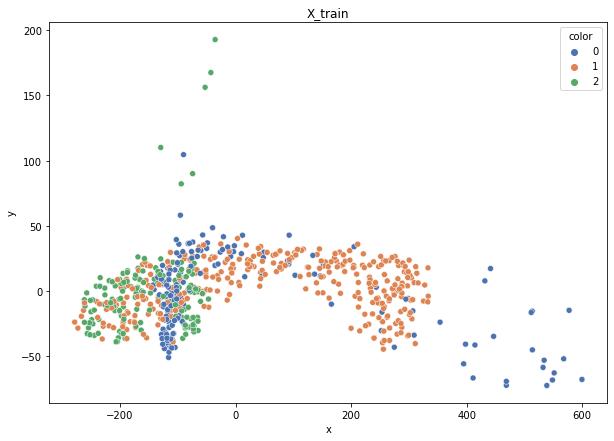

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.927
DT-f1-old-features: 0.909
DT-gmean-GlobalCS: 0.932
DT-gmean-old-features: 0.916
KNN-f1-GlobalCS: 0.937
KNN-f1-old-features: 0.937
KNN-gmean-GlobalCS: 0.927
KNN-gmean-old-features: 0.927
LDA-f1-GlobalCS: 0.953
LDA-f1-old-features: 0.953
LDA-gmean-GlobalCS: 0.964
LDA-gmean-old-features: 0.957
QDA-f1-GlobalCS: 0.988
QDA-f1-old-features: 0.988
QDA-gmean-GlobalCS: 0.992
QDA-gmean-old-features: 0.988
RF24-f1-GlobalCS: 0.959
RF24-f1-old-features: 0.976
RF24-gmean-GlobalCS: 0.965
RF24-gmean-old-features: 0.977


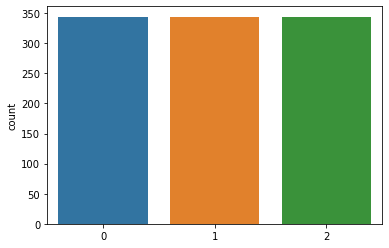

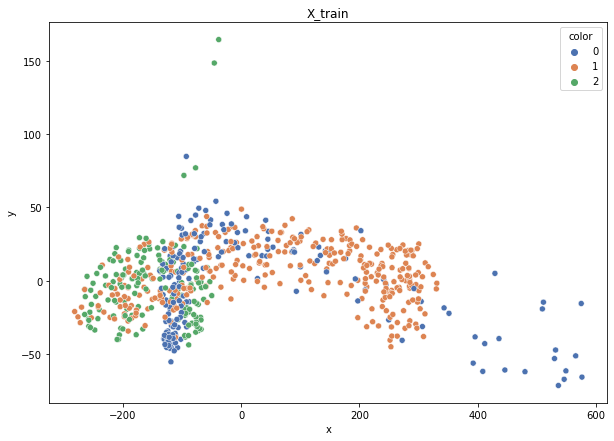

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.896
DT-f1-old-features: 0.877
DT-gmean-GlobalCS: 0.896
DT-gmean-old-features: 0.87
KNN-f1-GlobalCS: 0.937
KNN-f1-old-features: 0.937
KNN-gmean-GlobalCS: 0.935
KNN-gmean-old-features: 0.935
LDA-f1-GlobalCS: 0.911
LDA-f1-old-features: 0.939
LDA-gmean-GlobalCS: 0.928
LDA-gmean-old-features: 0.941
QDA-f1-GlobalCS: 0.964
QDA-f1-old-features: 0.964
QDA-gmean-GlobalCS: 0.969
QDA-gmean-old-features: 0.969
RF24-f1-GlobalCS: 0.966
RF24-f1-old-features: 0.978
RF24-gmean-GlobalCS: 0.973
RF24-gmean-old-features: 0.981
new_yeast


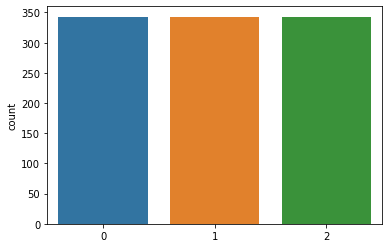

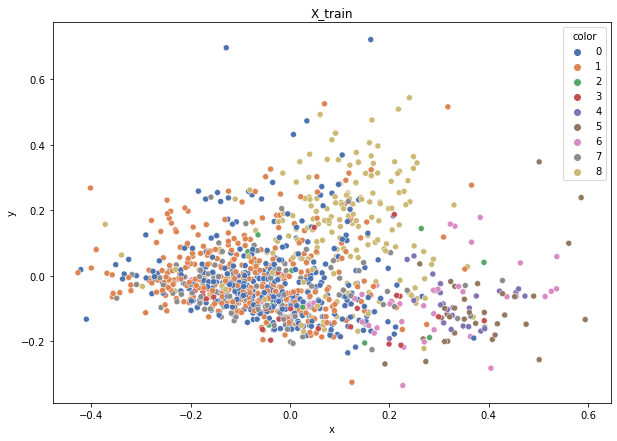

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.488
DT-f1-old-features: 0.494
DT-gmean-GlobalCS: 0.251
DT-gmean-old-features: 0.271
KNN-f1-GlobalCS: 0.545
KNN-f1-old-features: 0.545
KNN-gmean-GlobalCS: 0.51
KNN-gmean-old-features: 0.51
LDA-f1-GlobalCS: 0.535
LDA-f1-old-features: 0.564
LDA-gmean-GlobalCS: 0.569
LDA-gmean-old-features: 0.308
QDA-f1-GlobalCS: 0.11
QDA-f1-old-features: 0.155
QDA-gmean-GlobalCS: 0.008
QDA-gmean-old-features: 0.063
RF24-f1-GlobalCS: 0.538
RF24-f1-old-features: 0.565
RF24-gmean-GlobalCS: 0.494
RF24-gmean-old-features: 0.313


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


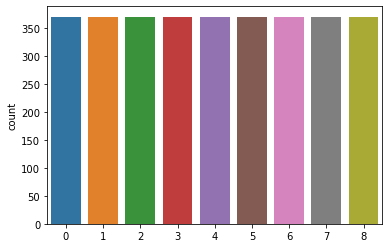

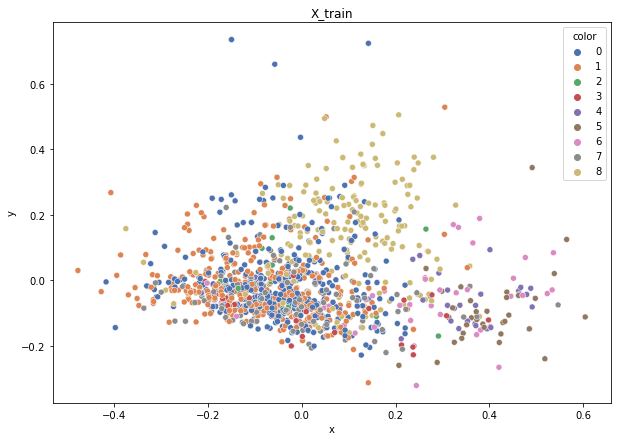

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.483
DT-f1-old-features: 0.451
DT-gmean-GlobalCS: 0.262
DT-gmean-old-features: 0.26
KNN-f1-GlobalCS: 0.494
KNN-f1-old-features: 0.494
KNN-gmean-GlobalCS: 0.268
KNN-gmean-old-features: 0.268
LDA-f1-GlobalCS: 0.528
LDA-f1-old-features: 0.57
LDA-gmean-GlobalCS: 0.517
LDA-gmean-old-features: 0.307
QDA-f1-GlobalCS: 0.136
QDA-f1-old-features: 0.084
QDA-gmean-GlobalCS: 0.031
QDA-gmean-old-features: 0.027
RF24-f1-GlobalCS: 0.618
RF24-f1-old-features: 0.612
RF24-gmean-GlobalCS: 0.34
RF24-gmean-old-features: 0.332


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


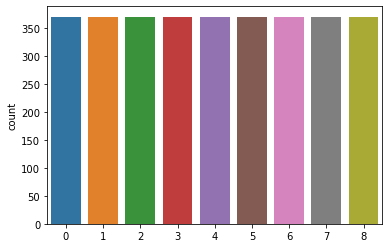

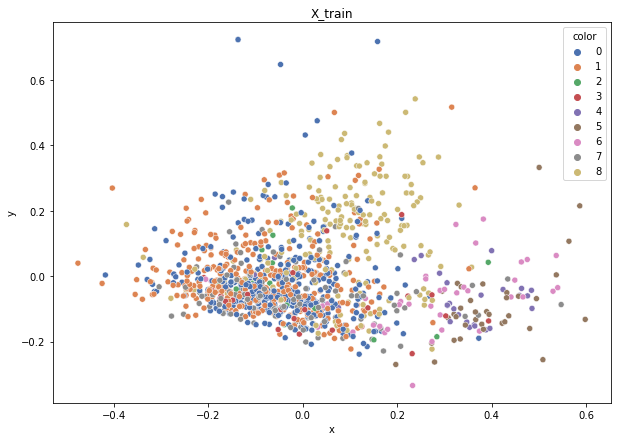

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.433
DT-f1-old-features: 0.407
DT-gmean-GlobalCS: 0.402
DT-gmean-old-features: 0.401
KNN-f1-GlobalCS: 0.451
KNN-f1-old-features: 0.451
KNN-gmean-GlobalCS: 0.422
KNN-gmean-old-features: 0.422
LDA-f1-GlobalCS: 0.435
LDA-f1-old-features: 0.492
LDA-gmean-GlobalCS: 0.441
LDA-gmean-old-features: 0.267
QDA-f1-GlobalCS: 0.042
QDA-f1-old-features: 0.23
QDA-gmean-GlobalCS: 0.007
QDA-gmean-old-features: 0.076
RF24-f1-GlobalCS: 0.538
RF24-f1-old-features: 0.538
RF24-gmean-GlobalCS: 0.502
RF24-gmean-old-features: 0.474


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


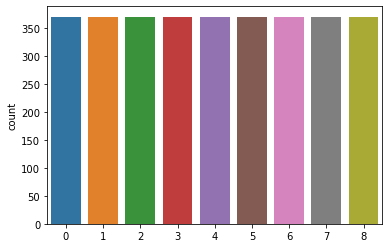

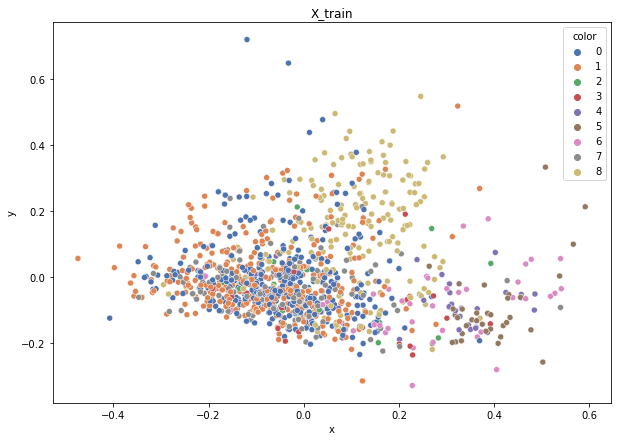

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.407
DT-f1-old-features: 0.437
DT-gmean-GlobalCS: 0.127
DT-gmean-old-features: 0.247
KNN-f1-GlobalCS: 0.492
KNN-f1-old-features: 0.492
KNN-gmean-GlobalCS: 0.439
KNN-gmean-old-features: 0.439
LDA-f1-GlobalCS: 0.482
LDA-f1-old-features: 0.5
LDA-gmean-GlobalCS: 0.484
LDA-gmean-old-features: 0.26
QDA-f1-GlobalCS: 0.161
QDA-f1-old-features: 0.108
QDA-gmean-GlobalCS: 0.017
QDA-gmean-old-features: 0.027
RF24-f1-GlobalCS: 0.469
RF24-f1-old-features: 0.531
RF24-gmean-GlobalCS: 0.244
RF24-gmean-old-features: 0.277


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


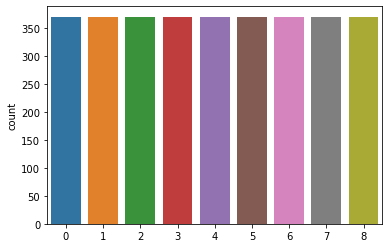

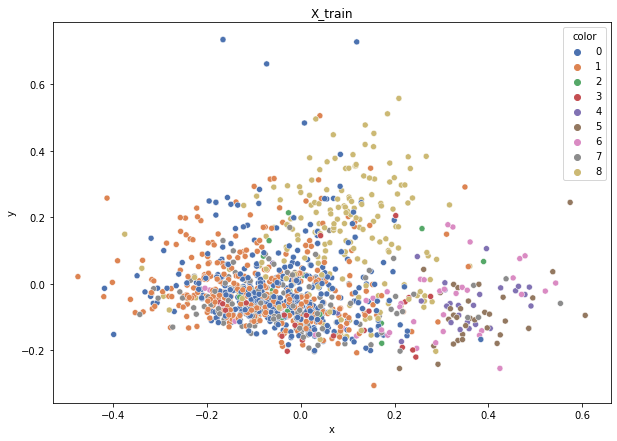

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.39
DT-f1-old-features: 0.423
DT-gmean-GlobalCS: 0.128
DT-gmean-old-features: 0.236
KNN-f1-GlobalCS: 0.452
KNN-f1-old-features: 0.452
KNN-gmean-GlobalCS: 0.403
KNN-gmean-old-features: 0.403
LDA-f1-GlobalCS: 0.508
LDA-f1-old-features: 0.532
LDA-gmean-GlobalCS: 0.473
LDA-gmean-old-features: 0.274
QDA-f1-GlobalCS: 0.12
QDA-f1-old-features: 0.235
QDA-gmean-GlobalCS: 0.012
QDA-gmean-old-features: 0.09
RF24-f1-GlobalCS: 0.56
RF24-f1-old-features: 0.569
RF24-gmean-GlobalCS: 0.295
RF24-gmean-old-features: 0.295
1czysty-cut


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


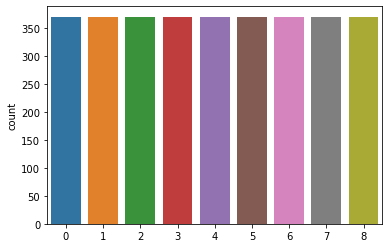

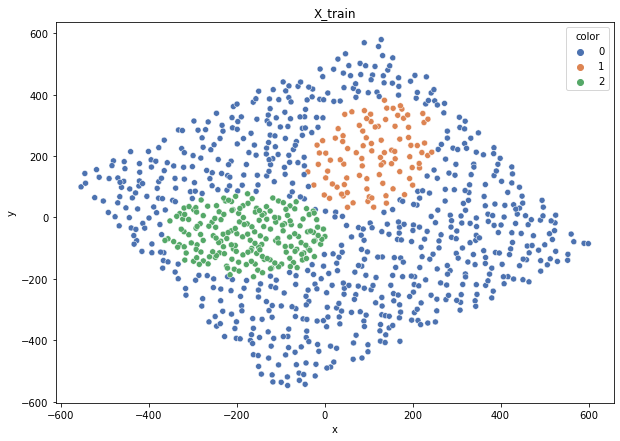

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.916
DT-f1-old-features: 0.901
DT-gmean-GlobalCS: 0.911
DT-gmean-old-features: 0.889
KNN-f1-GlobalCS: 0.937
KNN-f1-old-features: 0.937
KNN-gmean-GlobalCS: 0.941
KNN-gmean-old-features: 0.941
LDA-f1-GlobalCS: 0.488
LDA-f1-old-features: 0.262
LDA-gmean-GlobalCS: 0.639
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.869
QDA-f1-old-features: 0.805
QDA-gmean-GlobalCS: 0.952
QDA-gmean-old-features: 0.701
RF24-f1-GlobalCS: 0.932
RF24-f1-old-features: 0.934
RF24-gmean-GlobalCS: 0.944
RF24-gmean-old-features: 0.939


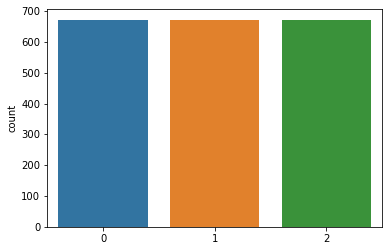

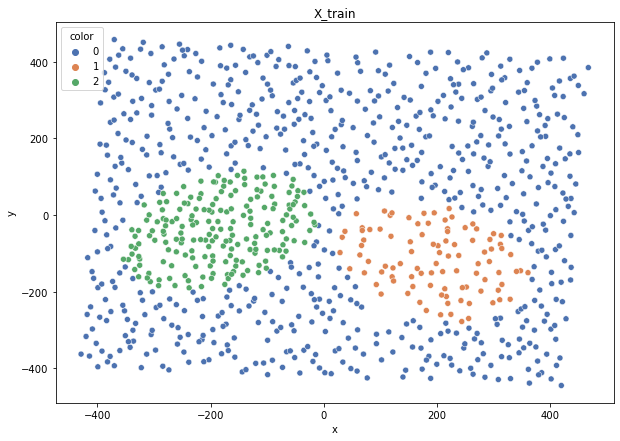

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.879
DT-f1-old-features: 0.929
DT-gmean-GlobalCS: 0.886
DT-gmean-old-features: 0.928
KNN-f1-GlobalCS: 0.945
KNN-f1-old-features: 0.945
KNN-gmean-GlobalCS: 0.934
KNN-gmean-old-features: 0.934
LDA-f1-GlobalCS: 0.48
LDA-f1-old-features: 0.265
LDA-gmean-GlobalCS: 0.61
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.89
QDA-f1-old-features: 0.817
QDA-gmean-GlobalCS: 0.956
QDA-gmean-old-features: 0.709
RF24-f1-GlobalCS: 0.884
RF24-f1-old-features: 0.901
RF24-gmean-GlobalCS: 0.901
RF24-gmean-old-features: 0.906


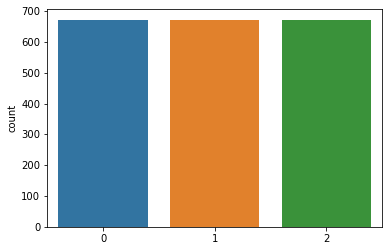

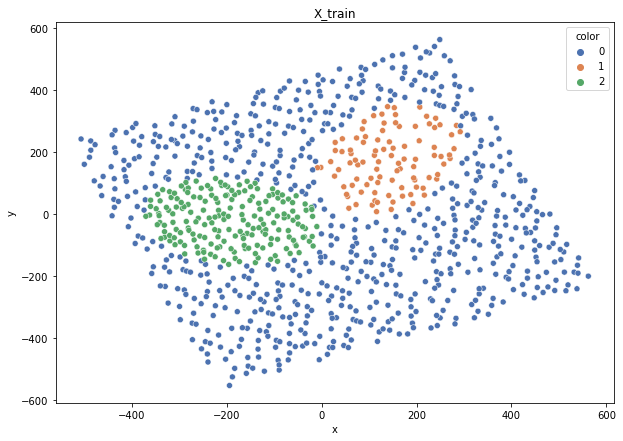

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.937
DT-f1-old-features: 0.942
DT-gmean-GlobalCS: 0.922
DT-gmean-old-features: 0.934
KNN-f1-GlobalCS: 0.957
KNN-f1-old-features: 0.957
KNN-gmean-GlobalCS: 0.933
KNN-gmean-old-features: 0.933
LDA-f1-GlobalCS: 0.495
LDA-f1-old-features: 0.256
LDA-gmean-GlobalCS: 0.63
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.849
QDA-f1-old-features: 0.856
QDA-gmean-GlobalCS: 0.941
QDA-gmean-old-features: 0.783
RF24-f1-GlobalCS: 0.946
RF24-f1-old-features: 0.951
RF24-gmean-GlobalCS: 0.947
RF24-gmean-old-features: 0.949


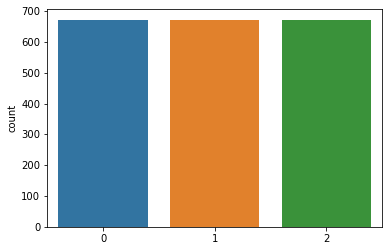

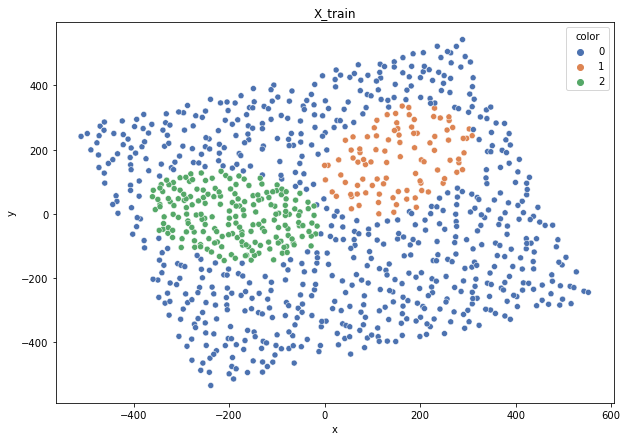

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.927
DT-f1-old-features: 0.932
DT-gmean-GlobalCS: 0.947
DT-gmean-old-features: 0.959
KNN-f1-GlobalCS: 0.931
KNN-f1-old-features: 0.931
KNN-gmean-GlobalCS: 0.957
KNN-gmean-old-features: 0.957
LDA-f1-GlobalCS: 0.487
LDA-f1-old-features: 0.28
LDA-gmean-GlobalCS: 0.629
LDA-gmean-old-features: 0.034
QDA-f1-GlobalCS: 0.824
QDA-f1-old-features: 0.864
QDA-gmean-GlobalCS: 0.927
QDA-gmean-old-features: 0.798
RF24-f1-GlobalCS: 0.913
RF24-f1-old-features: 0.937
RF24-gmean-GlobalCS: 0.955
RF24-gmean-old-features: 0.963


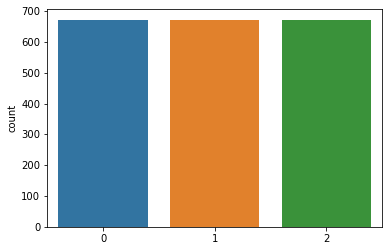

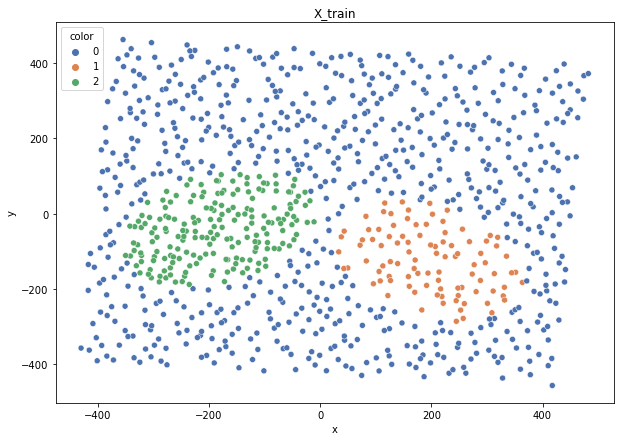

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.973
DT-f1-old-features: 0.973
DT-gmean-GlobalCS: 0.973
DT-gmean-old-features: 0.973
KNN-f1-GlobalCS: 0.958
KNN-f1-old-features: 0.958
KNN-gmean-GlobalCS: 0.955
KNN-gmean-old-features: 0.955
LDA-f1-GlobalCS: 0.482
LDA-f1-old-features: 0.259
LDA-gmean-GlobalCS: 0.616
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.882
QDA-f1-old-features: 0.728
QDA-gmean-GlobalCS: 0.95
QDA-gmean-old-features: 0.59
RF24-f1-GlobalCS: 0.949
RF24-f1-old-features: 0.948
RF24-gmean-GlobalCS: 0.948
RF24-gmean-old-features: 0.936
2delikatne-cut


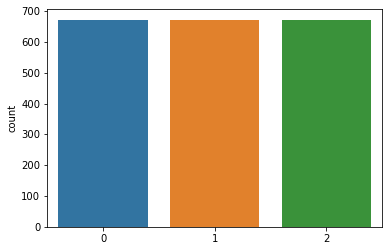

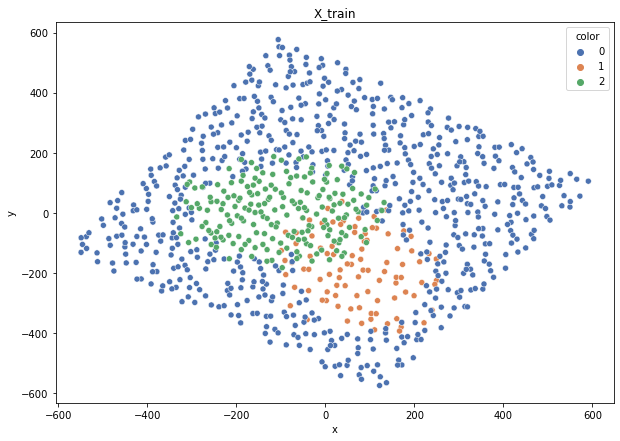

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.681
DT-f1-old-features: 0.69
DT-gmean-GlobalCS: 0.64
DT-gmean-old-features: 0.674
KNN-f1-GlobalCS: 0.693
KNN-f1-old-features: 0.693
KNN-gmean-GlobalCS: 0.674
KNN-gmean-old-features: 0.674
LDA-f1-GlobalCS: 0.466
LDA-f1-old-features: 0.274
LDA-gmean-GlobalCS: 0.599
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.732
QDA-f1-old-features: 0.615
QDA-gmean-GlobalCS: 0.846
QDA-gmean-old-features: 0.443
RF24-f1-GlobalCS: 0.729
RF24-f1-old-features: 0.774
RF24-gmean-GlobalCS: 0.736
RF24-gmean-old-features: 0.76


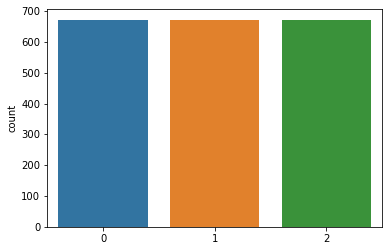

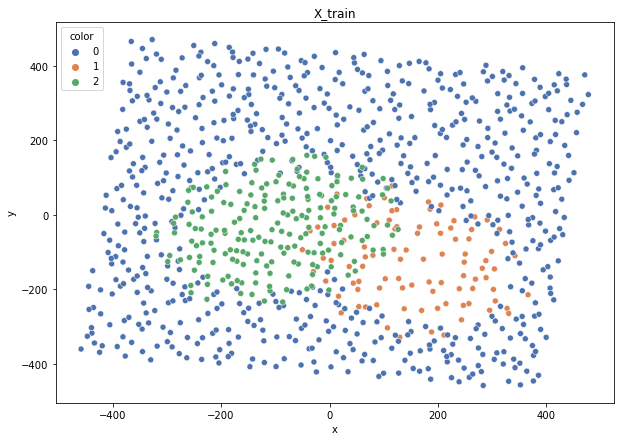

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.728
DT-f1-old-features: 0.763
DT-gmean-GlobalCS: 0.733
DT-gmean-old-features: 0.787
KNN-f1-GlobalCS: 0.742
KNN-f1-old-features: 0.742
KNN-gmean-GlobalCS: 0.727
KNN-gmean-old-features: 0.727
LDA-f1-GlobalCS: 0.451
LDA-f1-old-features: 0.275
LDA-gmean-GlobalCS: 0.577
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.736
QDA-f1-old-features: 0.646
QDA-gmean-GlobalCS: 0.834
QDA-gmean-old-features: 0.503
RF24-f1-GlobalCS: 0.764
RF24-f1-old-features: 0.776
RF24-gmean-GlobalCS: 0.768
RF24-gmean-old-features: 0.776


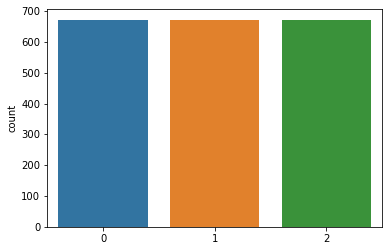

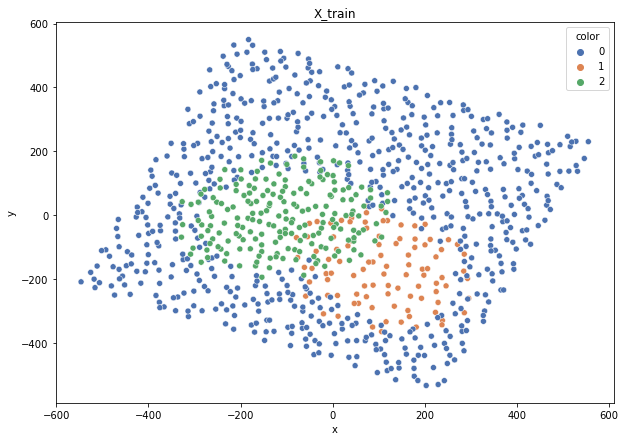

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.708
DT-f1-old-features: 0.712
DT-gmean-GlobalCS: 0.71
DT-gmean-old-features: 0.727
KNN-f1-GlobalCS: 0.666
KNN-f1-old-features: 0.666
KNN-gmean-GlobalCS: 0.636
KNN-gmean-old-features: 0.636
LDA-f1-GlobalCS: 0.455
LDA-f1-old-features: 0.275
LDA-gmean-GlobalCS: 0.564
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.745
QDA-f1-old-features: 0.657
QDA-gmean-GlobalCS: 0.812
QDA-gmean-old-features: 0.514
RF24-f1-GlobalCS: 0.756
RF24-f1-old-features: 0.757
RF24-gmean-GlobalCS: 0.784
RF24-gmean-old-features: 0.754


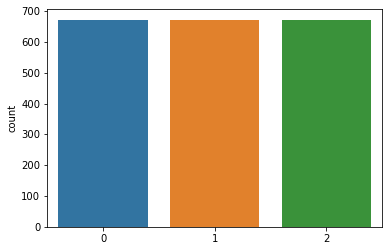

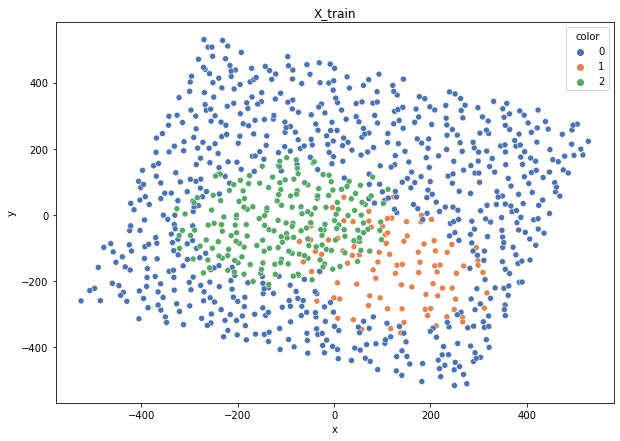

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.719
DT-f1-old-features: 0.712
DT-gmean-GlobalCS: 0.729
DT-gmean-old-features: 0.724
KNN-f1-GlobalCS: 0.73
KNN-f1-old-features: 0.73
KNN-gmean-GlobalCS: 0.735
KNN-gmean-old-features: 0.735
LDA-f1-GlobalCS: 0.475
LDA-f1-old-features: 0.274
LDA-gmean-GlobalCS: 0.594
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.717
QDA-f1-old-features: 0.668
QDA-gmean-GlobalCS: 0.809
QDA-gmean-old-features: 0.534
RF24-f1-GlobalCS: 0.721
RF24-f1-old-features: 0.714
RF24-gmean-GlobalCS: 0.723
RF24-gmean-old-features: 0.712


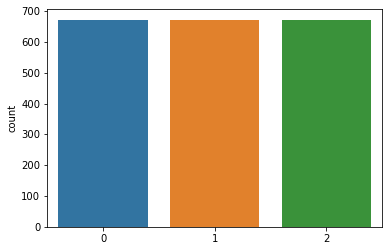

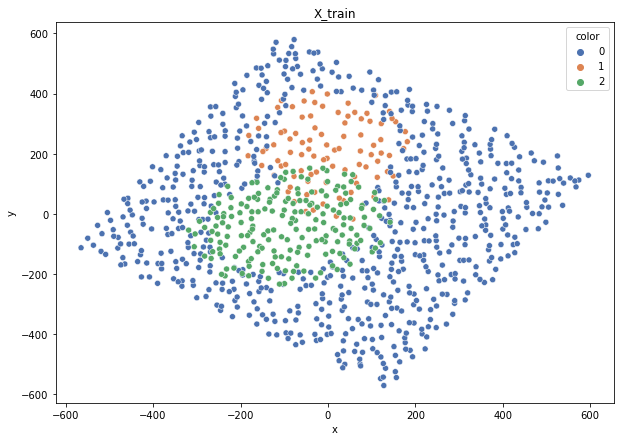

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.782
DT-f1-old-features: 0.744
DT-gmean-GlobalCS: 0.793
DT-gmean-old-features: 0.774
KNN-f1-GlobalCS: 0.669
KNN-f1-old-features: 0.669
KNN-gmean-GlobalCS: 0.62
KNN-gmean-old-features: 0.62
LDA-f1-GlobalCS: 0.415
LDA-f1-old-features: 0.273
LDA-gmean-GlobalCS: 0.528
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.715
QDA-f1-old-features: 0.709
QDA-gmean-GlobalCS: 0.813
QDA-gmean-old-features: 0.579
RF24-f1-GlobalCS: 0.768
RF24-f1-old-features: 0.785
RF24-gmean-GlobalCS: 0.768
RF24-gmean-old-features: 0.783
3mocniej-cut


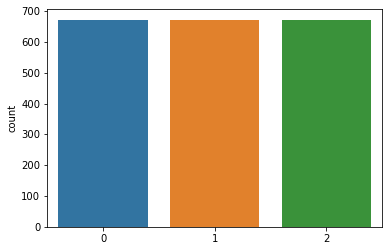

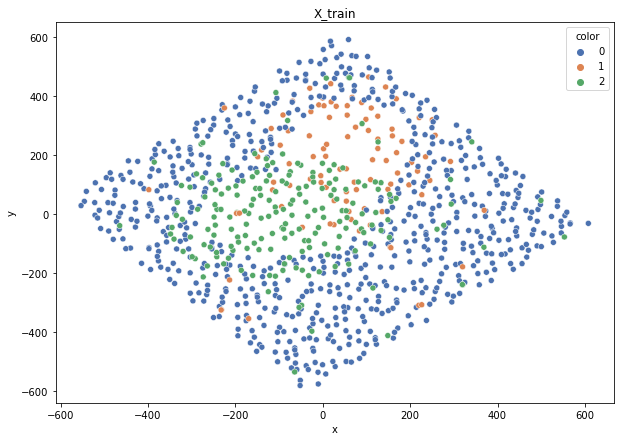

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.55
DT-f1-old-features: 0.522
DT-gmean-GlobalCS: 0.551
DT-gmean-old-features: 0.524
KNN-f1-GlobalCS: 0.537
KNN-f1-old-features: 0.537
KNN-gmean-GlobalCS: 0.502
KNN-gmean-old-features: 0.502
LDA-f1-GlobalCS: 0.392
LDA-f1-old-features: 0.275
LDA-gmean-GlobalCS: 0.498
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.486
QDA-f1-old-features: 0.275
QDA-gmean-GlobalCS: 0.595
QDA-gmean-old-features: 0.01
RF24-f1-GlobalCS: 0.586
RF24-f1-old-features: 0.545
RF24-gmean-GlobalCS: 0.564
RF24-gmean-old-features: 0.493


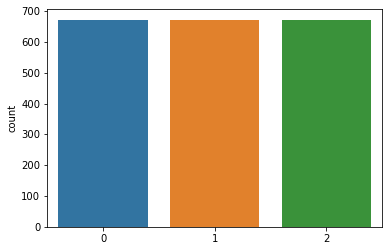

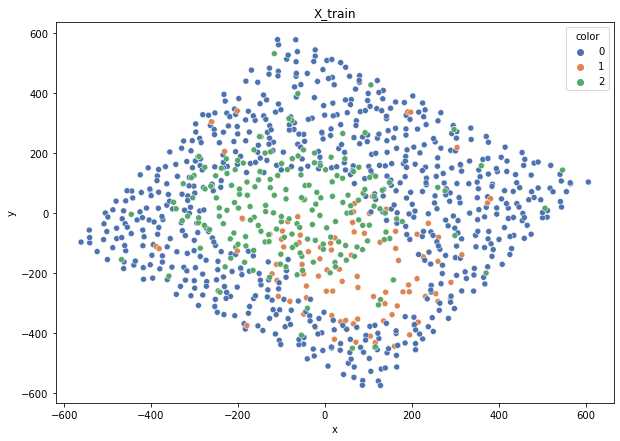

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.538
DT-f1-old-features: 0.531
DT-gmean-GlobalCS: 0.522
DT-gmean-old-features: 0.547
KNN-f1-GlobalCS: 0.536
KNN-f1-old-features: 0.536
KNN-gmean-GlobalCS: 0.479
KNN-gmean-old-features: 0.479
LDA-f1-GlobalCS: 0.437
LDA-f1-old-features: 0.275
LDA-gmean-GlobalCS: 0.541
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.541
QDA-f1-old-features: 0.275
QDA-gmean-GlobalCS: 0.654
QDA-gmean-old-features: 0.01
RF24-f1-GlobalCS: 0.598
RF24-f1-old-features: 0.581
RF24-gmean-GlobalCS: 0.582
RF24-gmean-old-features: 0.551


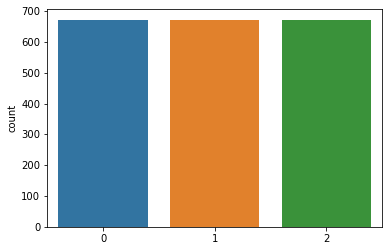

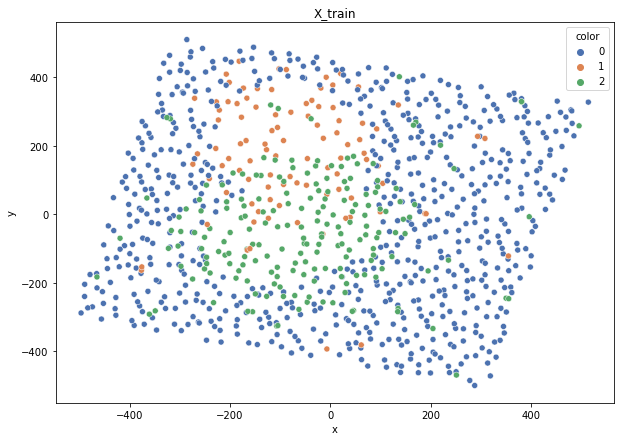

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.471
DT-f1-old-features: 0.442
DT-gmean-GlobalCS: 0.435
DT-gmean-old-features: 0.43
KNN-f1-GlobalCS: 0.438
KNN-f1-old-features: 0.438
KNN-gmean-GlobalCS: 0.373
KNN-gmean-old-features: 0.373
LDA-f1-GlobalCS: 0.4
LDA-f1-old-features: 0.275
LDA-gmean-GlobalCS: 0.508
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.473
QDA-f1-old-features: 0.275
QDA-gmean-GlobalCS: 0.569
QDA-gmean-old-features: 0.01
RF24-f1-GlobalCS: 0.473
RF24-f1-old-features: 0.481
RF24-gmean-GlobalCS: 0.423
RF24-gmean-old-features: 0.396


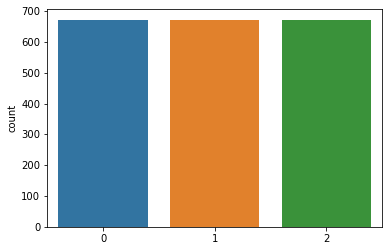

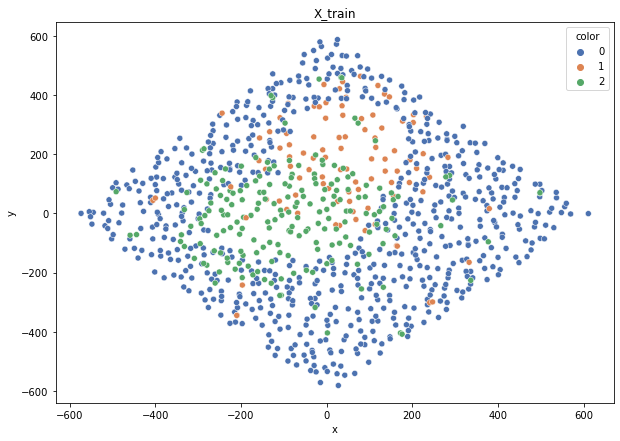

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.481
DT-f1-old-features: 0.477
DT-gmean-GlobalCS: 0.468
DT-gmean-old-features: 0.473
KNN-f1-GlobalCS: 0.51
KNN-f1-old-features: 0.51
KNN-gmean-GlobalCS: 0.464
KNN-gmean-old-features: 0.464
LDA-f1-GlobalCS: 0.409
LDA-f1-old-features: 0.275
LDA-gmean-GlobalCS: 0.494
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.541
QDA-f1-old-features: 0.275
QDA-gmean-GlobalCS: 0.65
QDA-gmean-old-features: 0.01
RF24-f1-GlobalCS: 0.571
RF24-f1-old-features: 0.585
RF24-gmean-GlobalCS: 0.565
RF24-gmean-old-features: 0.584


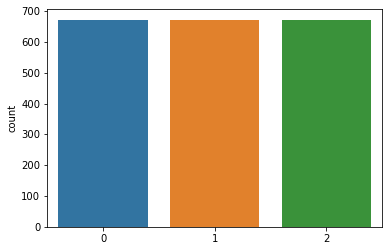

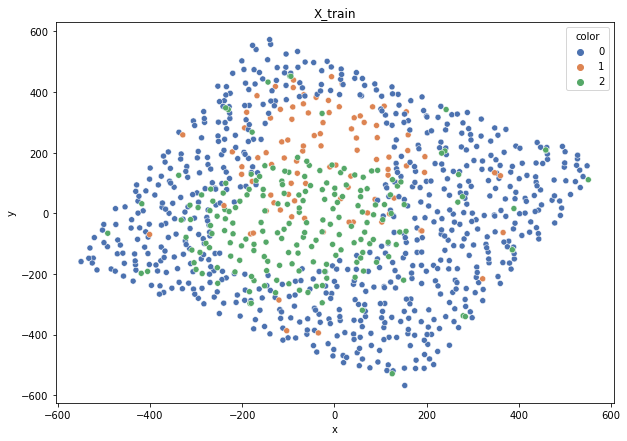

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.556
DT-f1-old-features: 0.552
DT-gmean-GlobalCS: 0.515
DT-gmean-old-features: 0.536
KNN-f1-GlobalCS: 0.522
KNN-f1-old-features: 0.522
KNN-gmean-GlobalCS: 0.471
KNN-gmean-old-features: 0.471
LDA-f1-GlobalCS: 0.438
LDA-f1-old-features: 0.275
LDA-gmean-GlobalCS: 0.556
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.563
QDA-f1-old-features: 0.275
QDA-gmean-GlobalCS: 0.692
QDA-gmean-old-features: 0.01
RF24-f1-GlobalCS: 0.582
RF24-f1-old-features: 0.612
RF24-gmean-GlobalCS: 0.566
RF24-gmean-old-features: 0.574
4delikatne-bezover-cut


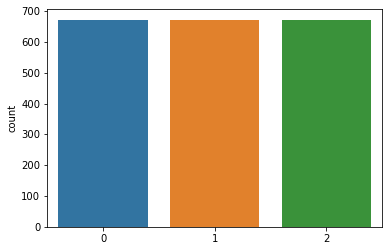

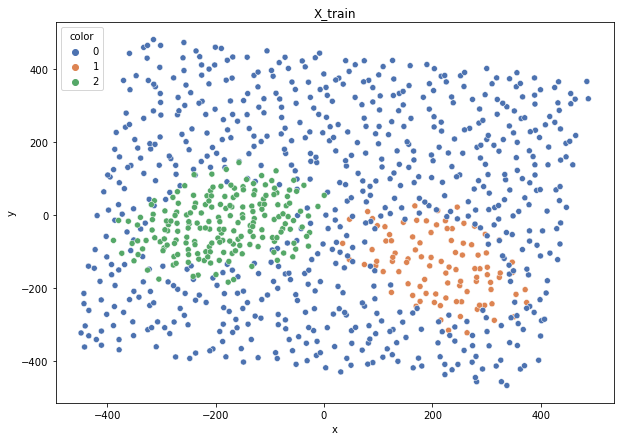

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.801
DT-f1-old-features: 0.809
DT-gmean-GlobalCS: 0.797
DT-gmean-old-features: 0.814
KNN-f1-GlobalCS: 0.772
KNN-f1-old-features: 0.772
KNN-gmean-GlobalCS: 0.746
KNN-gmean-old-features: 0.746
LDA-f1-GlobalCS: 0.489
LDA-f1-old-features: 0.265
LDA-gmean-GlobalCS: 0.633
LDA-gmean-old-features: 0.026
QDA-f1-GlobalCS: 0.794
QDA-f1-old-features: 0.739
QDA-gmean-GlobalCS: 0.902
QDA-gmean-old-features: 0.64
RF24-f1-GlobalCS: 0.795
RF24-f1-old-features: 0.811
RF24-gmean-GlobalCS: 0.808
RF24-gmean-old-features: 0.811


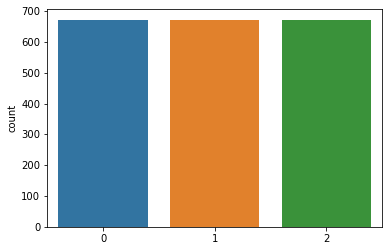

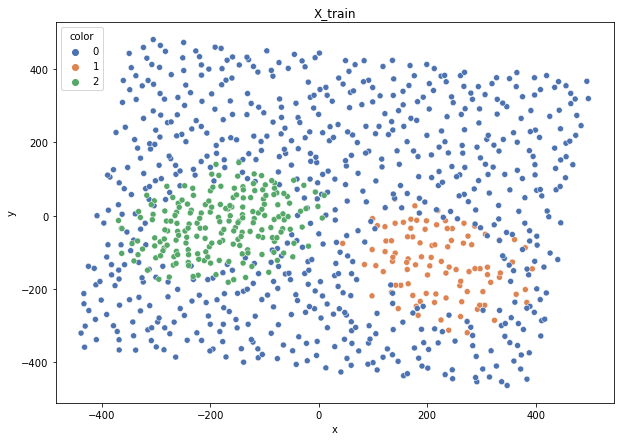

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.755
DT-f1-old-features: 0.761
DT-gmean-GlobalCS: 0.744
DT-gmean-old-features: 0.769
KNN-f1-GlobalCS: 0.767
KNN-f1-old-features: 0.767
KNN-gmean-GlobalCS: 0.776
KNN-gmean-old-features: 0.776
LDA-f1-GlobalCS: 0.471
LDA-f1-old-features: 0.274
LDA-gmean-GlobalCS: 0.61
LDA-gmean-old-features: 0.027
QDA-f1-GlobalCS: 0.78
QDA-f1-old-features: 0.843
QDA-gmean-GlobalCS: 0.896
QDA-gmean-old-features: 0.8
RF24-f1-GlobalCS: 0.811
RF24-f1-old-features: 0.826
RF24-gmean-GlobalCS: 0.84
RF24-gmean-old-features: 0.845


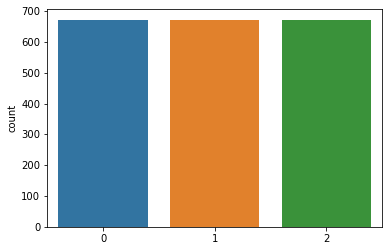

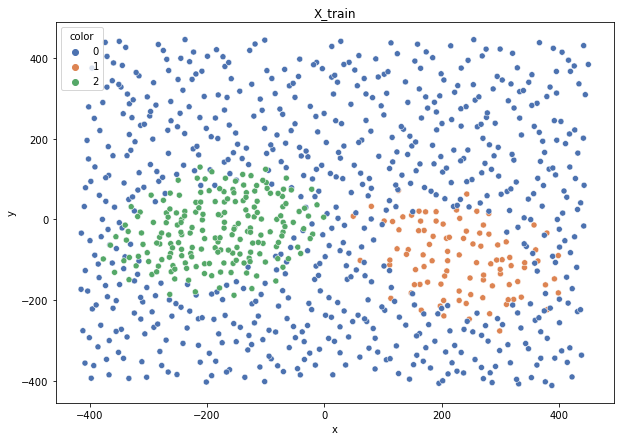

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.749
DT-f1-old-features: 0.785
DT-gmean-GlobalCS: 0.724
DT-gmean-old-features: 0.785
KNN-f1-GlobalCS: 0.766
KNN-f1-old-features: 0.766
KNN-gmean-GlobalCS: 0.744
KNN-gmean-old-features: 0.744
LDA-f1-GlobalCS: 0.5
LDA-f1-old-features: 0.276
LDA-gmean-GlobalCS: 0.633
LDA-gmean-old-features: 0.027
QDA-f1-GlobalCS: 0.835
QDA-f1-old-features: 0.718
QDA-gmean-GlobalCS: 0.919
QDA-gmean-old-features: 0.599
RF24-f1-GlobalCS: 0.795
RF24-f1-old-features: 0.801
RF24-gmean-GlobalCS: 0.796
RF24-gmean-old-features: 0.78


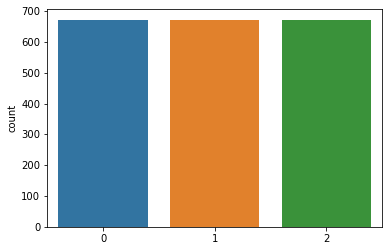

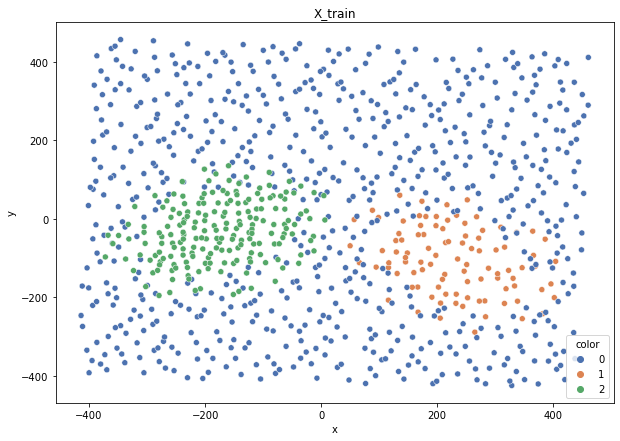

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.795
DT-f1-old-features: 0.805
DT-gmean-GlobalCS: 0.817
DT-gmean-old-features: 0.831
KNN-f1-GlobalCS: 0.747
KNN-f1-old-features: 0.747
KNN-gmean-GlobalCS: 0.749
KNN-gmean-old-features: 0.749
LDA-f1-GlobalCS: 0.478
LDA-f1-old-features: 0.265
LDA-gmean-GlobalCS: 0.622
LDA-gmean-old-features: 0.01
QDA-f1-GlobalCS: 0.756
QDA-f1-old-features: 0.828
QDA-gmean-GlobalCS: 0.889
QDA-gmean-old-features: 0.78
RF24-f1-GlobalCS: 0.819
RF24-f1-old-features: 0.827
RF24-gmean-GlobalCS: 0.871
RF24-gmean-old-features: 0.871


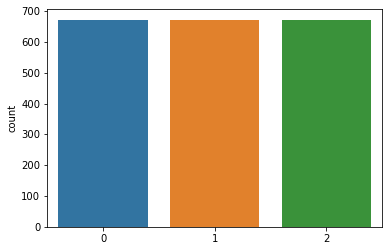

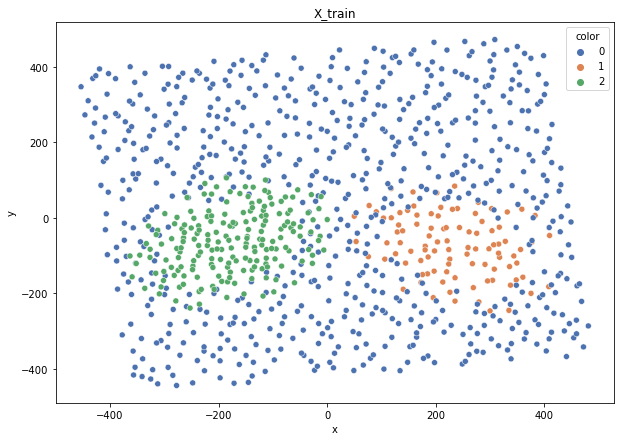

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.827
DT-f1-old-features: 0.821
DT-gmean-GlobalCS: 0.852
DT-gmean-old-features: 0.866
KNN-f1-GlobalCS: 0.786
KNN-f1-old-features: 0.786
KNN-gmean-GlobalCS: 0.788
KNN-gmean-old-features: 0.788
LDA-f1-GlobalCS: 0.512
LDA-f1-old-features: 0.264
LDA-gmean-GlobalCS: 0.664
LDA-gmean-old-features: 0.026
QDA-f1-GlobalCS: 0.812
QDA-f1-old-features: 0.841
QDA-gmean-GlobalCS: 0.918
QDA-gmean-old-features: 0.767
RF24-f1-GlobalCS: 0.816
RF24-f1-old-features: 0.836
RF24-gmean-GlobalCS: 0.875
RF24-gmean-old-features: 0.87
balance-scale


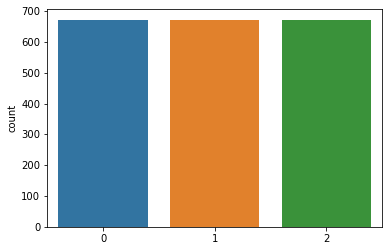

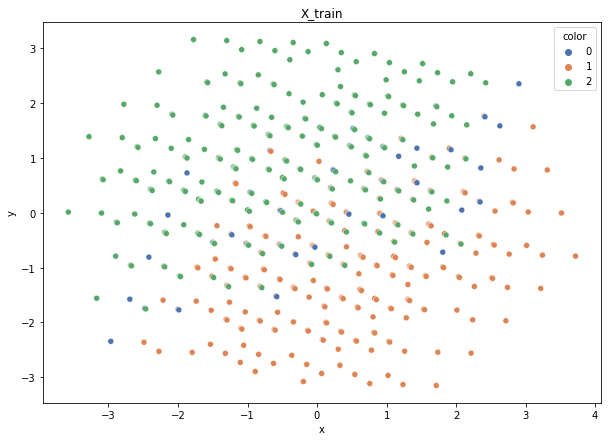

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.413
DT-f1-old-features: 0.568
DT-gmean-GlobalCS: 0.069
DT-gmean-old-features: 0.088
KNN-f1-GlobalCS: 0.354
KNN-f1-old-features: 0.568
KNN-gmean-GlobalCS: 0.065
KNN-gmean-old-features: 0.09
LDA-f1-GlobalCS: 0.726
LDA-f1-old-features: 0.617
LDA-gmean-GlobalCS: 0.841
LDA-gmean-old-features: 0.098
QDA-f1-GlobalCS: 1.0
QDA-f1-old-features: 0.936
QDA-gmean-GlobalCS: 1.0
QDA-gmean-old-features: 0.971
RF24-f1-GlobalCS: 0.473
RF24-f1-old-features: 0.585
RF24-gmean-GlobalCS: 0.076
RF24-gmean-old-features: 0.092


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


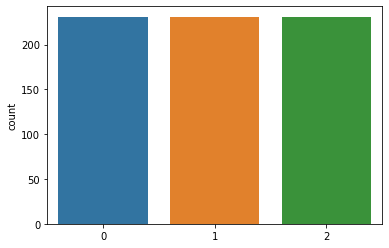

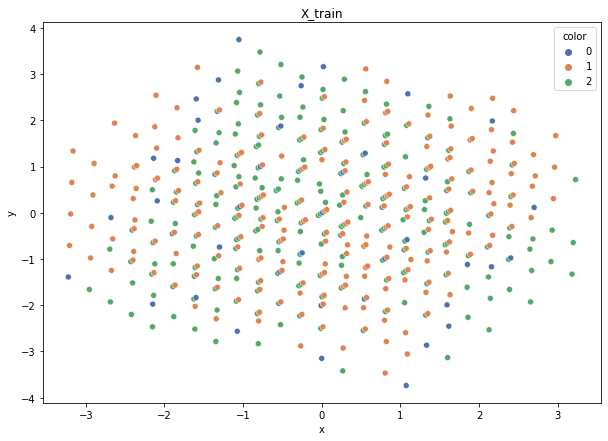

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.469
DT-f1-old-features: 0.638
DT-gmean-GlobalCS: 0.078
DT-gmean-old-features: 0.585
KNN-f1-GlobalCS: 0.39
KNN-f1-old-features: 0.545
KNN-gmean-GlobalCS: 0.07
KNN-gmean-old-features: 0.088
LDA-f1-GlobalCS: 0.7
LDA-f1-old-features: 0.601
LDA-gmean-GlobalCS: 0.817
LDA-gmean-old-features: 0.096
QDA-f1-GlobalCS: 0.983
QDA-f1-old-features: 0.845
QDA-gmean-GlobalCS: 0.982
QDA-gmean-old-features: 0.908
RF24-f1-GlobalCS: 0.495
RF24-f1-old-features: 0.591
RF24-gmean-GlobalCS: 0.081
RF24-gmean-old-features: 0.092


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


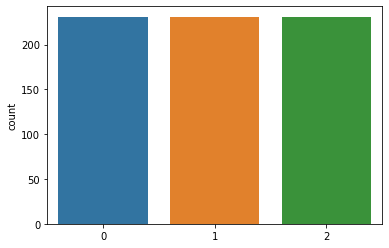

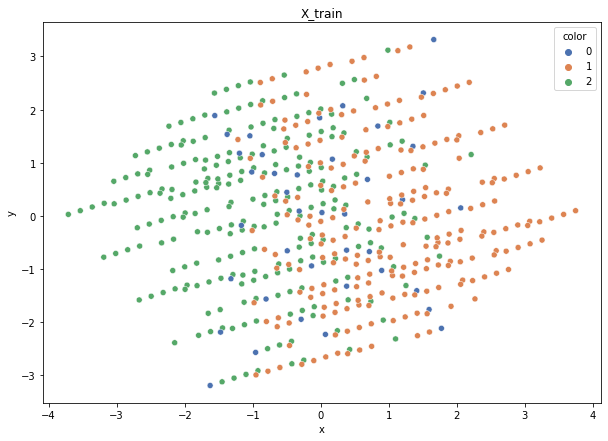

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.458
DT-f1-old-features: 0.655
DT-gmean-GlobalCS: 0.41
DT-gmean-old-features: 0.597
KNN-f1-GlobalCS: 0.301
KNN-f1-old-features: 0.566
KNN-gmean-GlobalCS: 0.059
KNN-gmean-old-features: 0.09
LDA-f1-GlobalCS: 0.686
LDA-f1-old-features: 0.6
LDA-gmean-GlobalCS: 0.803
LDA-gmean-old-features: 0.096
QDA-f1-GlobalCS: 0.983
QDA-f1-old-features: 0.836
QDA-gmean-GlobalCS: 0.982
QDA-gmean-old-features: 0.923
RF24-f1-GlobalCS: 0.485
RF24-f1-old-features: 0.602
RF24-gmean-GlobalCS: 0.351
RF24-gmean-old-features: 0.093


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


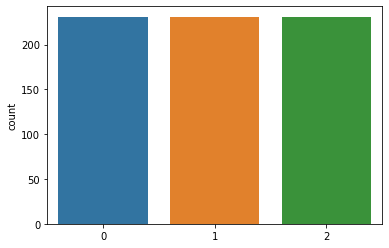

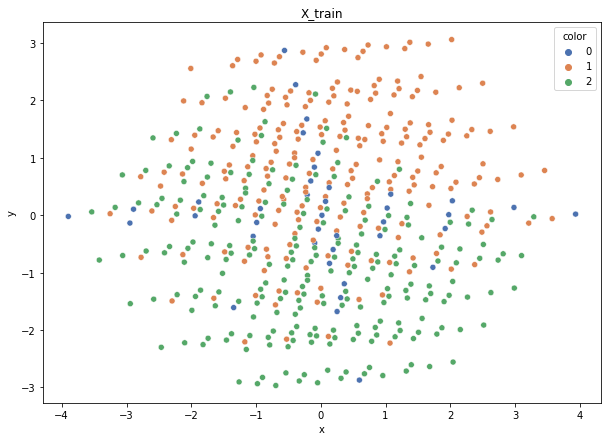

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.424
DT-f1-old-features: 0.582
DT-gmean-GlobalCS: 0.071
DT-gmean-old-features: 0.397
KNN-f1-GlobalCS: 0.298
KNN-f1-old-features: 0.562
KNN-gmean-GlobalCS: 0.06
KNN-gmean-old-features: 0.089
LDA-f1-GlobalCS: 0.637
LDA-f1-old-features: 0.6
LDA-gmean-GlobalCS: 0.752
LDA-gmean-old-features: 0.096
QDA-f1-GlobalCS: 0.988
QDA-f1-old-features: 0.809
QDA-gmean-GlobalCS: 0.988
QDA-gmean-old-features: 0.862
RF24-f1-GlobalCS: 0.526
RF24-f1-old-features: 0.603
RF24-gmean-GlobalCS: 0.085
RF24-gmean-old-features: 0.094


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


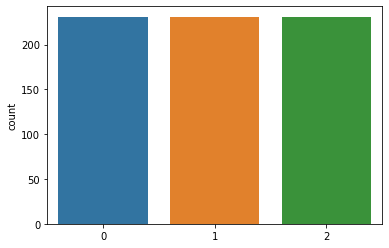

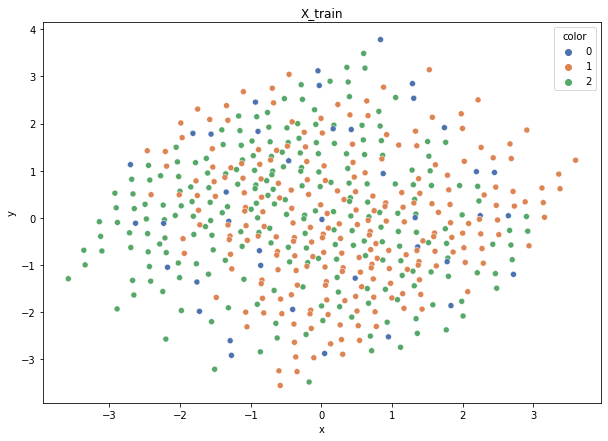

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.47
DT-f1-old-features: 0.582
DT-gmean-GlobalCS: 0.077
DT-gmean-old-features: 0.415
KNN-f1-GlobalCS: 0.379
KNN-f1-old-features: 0.563
KNN-gmean-GlobalCS: 0.069
KNN-gmean-old-features: 0.089
LDA-f1-GlobalCS: 0.692
LDA-f1-old-features: 0.62
LDA-gmean-GlobalCS: 0.819
LDA-gmean-old-features: 0.098
QDA-f1-GlobalCS: 0.977
QDA-f1-old-features: 0.859
QDA-gmean-GlobalCS: 0.977
QDA-gmean-old-features: 0.917
RF24-f1-GlobalCS: 0.481
RF24-f1-old-features: 0.587
RF24-gmean-GlobalCS: 0.077
RF24-gmean-old-features: 0.091
cleveland


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


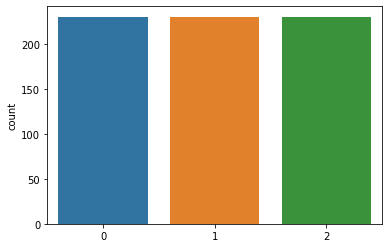

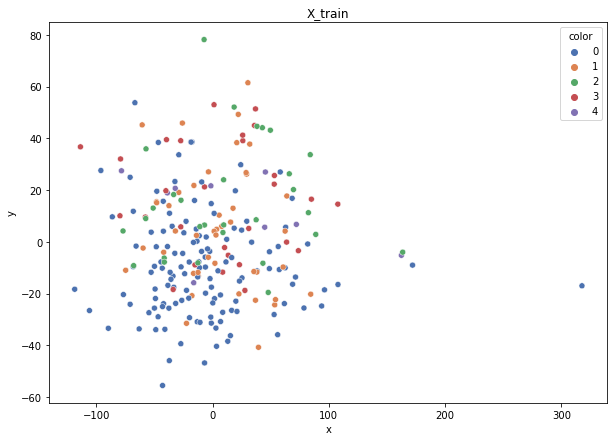

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.289
DT-f1-old-features: 0.266
DT-gmean-GlobalCS: 0.101
DT-gmean-old-features: 0.098
KNN-f1-GlobalCS: 0.278
KNN-f1-old-features: 0.275
KNN-gmean-GlobalCS: 0.085
KNN-gmean-old-features: 0.089
LDA-f1-GlobalCS: 0.376
LDA-f1-old-features: 0.365
LDA-gmean-GlobalCS: 0.116
LDA-gmean-old-features: 0.111
QDA-f1-GlobalCS: 0.132
QDA-f1-old-features: 0.392
QDA-gmean-GlobalCS: 0.012
QDA-gmean-old-features: 0.132
RF24-f1-GlobalCS: 0.327
RF24-f1-old-features: 0.316
RF24-gmean-GlobalCS: 0.105
RF24-gmean-old-features: 0.092


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


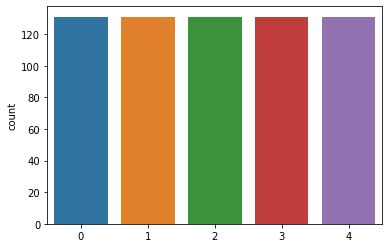

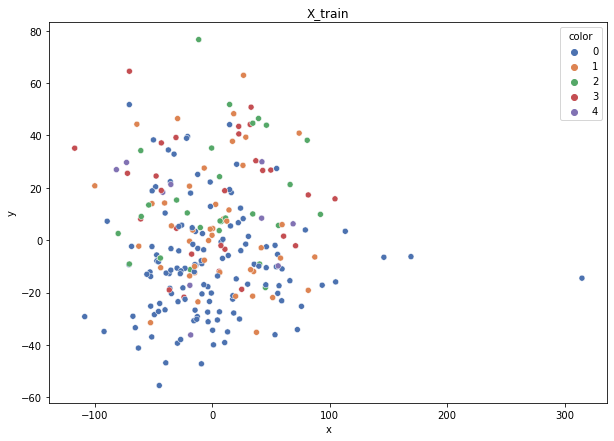

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.214
DT-f1-old-features: 0.281
DT-gmean-GlobalCS: 0.076
DT-gmean-old-features: 0.101
KNN-f1-GlobalCS: 0.41
KNN-f1-old-features: 0.356
KNN-gmean-GlobalCS: 0.36
KNN-gmean-old-features: 0.122
LDA-f1-GlobalCS: 0.361
LDA-f1-old-features: 0.355
LDA-gmean-GlobalCS: 0.352
LDA-gmean-old-features: 0.108
QDA-f1-GlobalCS: 0.063
QDA-f1-old-features: 0.39
QDA-gmean-GlobalCS: 0.009
QDA-gmean-old-features: 0.136
RF24-f1-GlobalCS: 0.305
RF24-f1-old-features: 0.307
RF24-gmean-GlobalCS: 0.098
RF24-gmean-old-features: 0.093


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


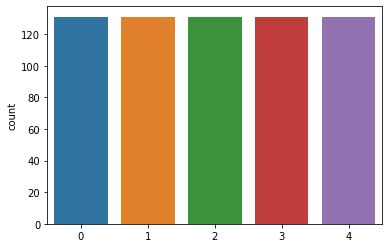

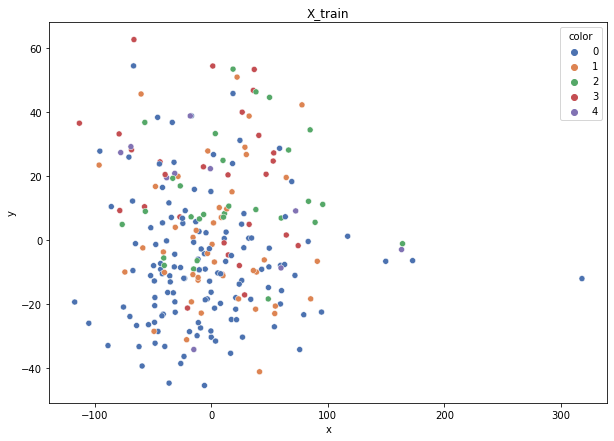

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.287
DT-f1-old-features: 0.368
DT-gmean-GlobalCS: 0.097
DT-gmean-old-features: 0.128
KNN-f1-GlobalCS: 0.382
KNN-f1-old-features: 0.325
KNN-gmean-GlobalCS: 0.311
KNN-gmean-old-features: 0.109
LDA-f1-GlobalCS: 0.276
LDA-f1-old-features: 0.261
LDA-gmean-GlobalCS: 0.088
LDA-gmean-old-features: 0.034
QDA-f1-GlobalCS: 0.194
QDA-f1-old-features: 0.345
QDA-gmean-GlobalCS: 0.034
QDA-gmean-old-features: 0.12
RF24-f1-GlobalCS: 0.407
RF24-f1-old-features: 0.315
RF24-gmean-GlobalCS: 0.291
RF24-gmean-old-features: 0.1


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


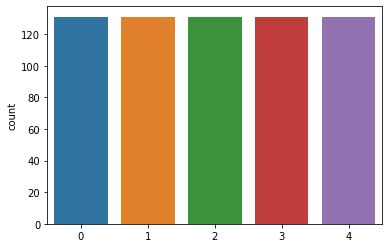

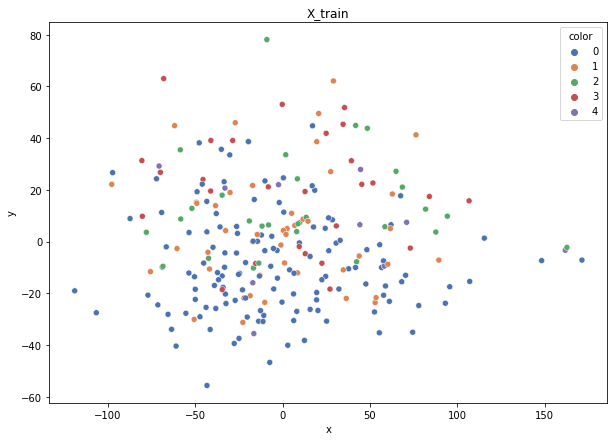

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.274
DT-f1-old-features: 0.305
DT-gmean-GlobalCS: 0.094
DT-gmean-old-features: 0.112
KNN-f1-GlobalCS: 0.253
KNN-f1-old-features: 0.254
KNN-gmean-GlobalCS: 0.036
KNN-gmean-old-features: 0.036
LDA-f1-GlobalCS: 0.26
LDA-f1-old-features: 0.287
LDA-gmean-GlobalCS: 0.033
LDA-gmean-old-features: 0.086
QDA-f1-GlobalCS: 0.224
QDA-f1-old-features: 0.254
QDA-gmean-GlobalCS: 0.039
QDA-gmean-old-features: 0.032
RF24-f1-GlobalCS: 0.345
RF24-f1-old-features: 0.309
RF24-gmean-GlobalCS: 0.114
RF24-gmean-old-features: 0.098


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


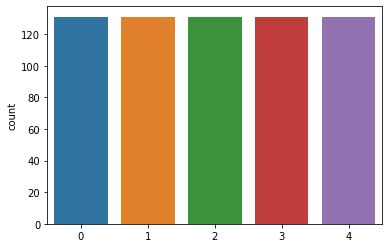

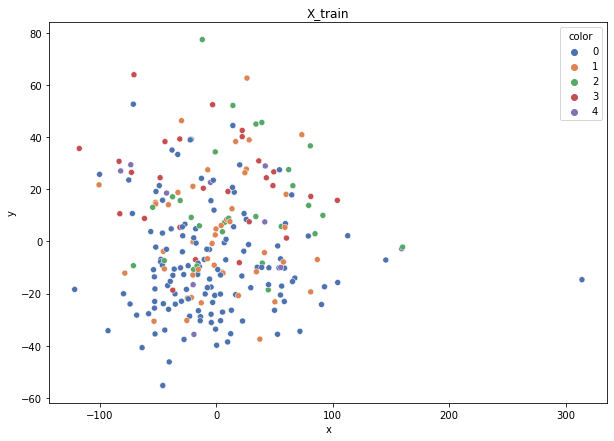

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.23
DT-f1-old-features: 0.227
DT-gmean-GlobalCS: 0.033
DT-gmean-old-features: 0.03
KNN-f1-GlobalCS: 0.261
KNN-f1-old-features: 0.275
KNN-gmean-GlobalCS: 0.033
KNN-gmean-old-features: 0.035
LDA-f1-GlobalCS: 0.375
LDA-f1-old-features: 0.415
LDA-gmean-GlobalCS: 0.125
LDA-gmean-old-features: 0.363
QDA-f1-GlobalCS: 0.139
QDA-f1-old-features: 0.268
QDA-gmean-GlobalCS: 0.004
QDA-gmean-old-features: 0.037
RF24-f1-GlobalCS: 0.357
RF24-f1-old-features: 0.497
RF24-gmean-GlobalCS: 0.106
RF24-gmean-old-features: 0.452
cleveland_v2


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


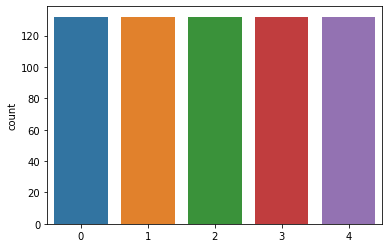

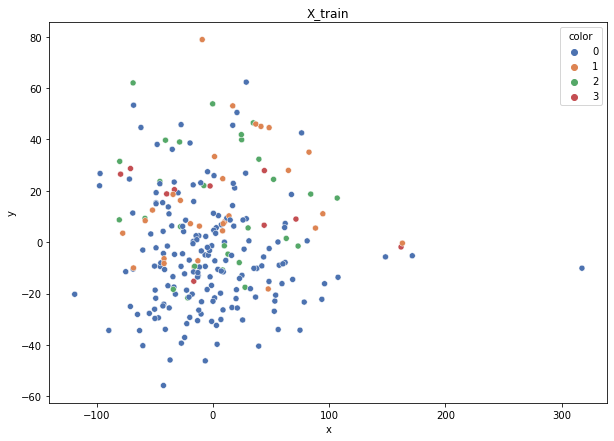

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.337
DT-f1-old-features: 0.358
DT-gmean-GlobalCS: 0.085
DT-gmean-old-features: 0.099
KNN-f1-GlobalCS: 0.328
KNN-f1-old-features: 0.238
KNN-gmean-GlobalCS: 0.025
KNN-gmean-old-features: 0.018
LDA-f1-GlobalCS: 0.506
LDA-f1-old-features: 0.376
LDA-gmean-GlobalCS: 0.508
LDA-gmean-old-features: 0.028
QDA-f1-GlobalCS: 0.119
QDA-f1-old-features: 0.394
QDA-gmean-GlobalCS: 0.019
QDA-gmean-old-features: 0.093
RF24-f1-GlobalCS: 0.396
RF24-f1-old-features: 0.459
RF24-gmean-GlobalCS: 0.102
RF24-gmean-old-features: 0.121


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


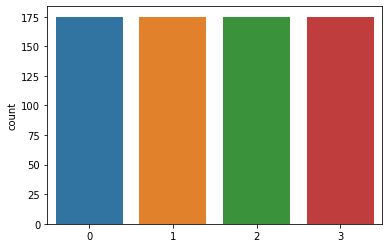

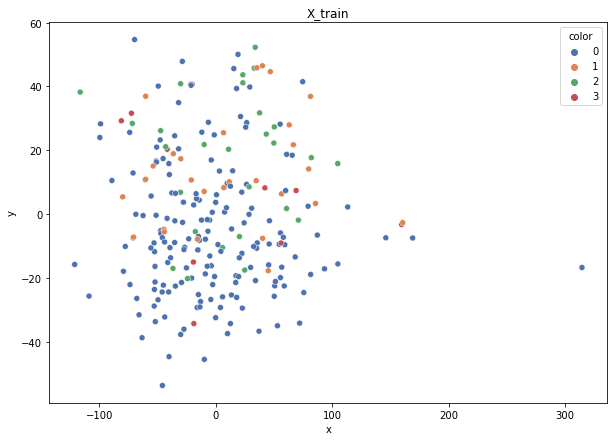

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.266
DT-f1-old-features: 0.484
DT-gmean-GlobalCS: 0.022
DT-gmean-old-features: 0.546
KNN-f1-GlobalCS: 0.339
KNN-f1-old-features: 0.39
KNN-gmean-GlobalCS: 0.09
KNN-gmean-old-features: 0.11
LDA-f1-GlobalCS: 0.25
LDA-f1-old-features: 0.344
LDA-gmean-GlobalCS: 0.021
LDA-gmean-old-features: 0.085
QDA-f1-GlobalCS: 0.221
QDA-f1-old-features: 0.399
QDA-gmean-GlobalCS: 0.076
QDA-gmean-old-features: 0.11
RF24-f1-GlobalCS: 0.391
RF24-f1-old-features: 0.346
RF24-gmean-GlobalCS: 0.325
RF24-gmean-old-features: 0.085


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


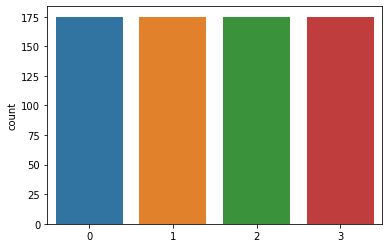

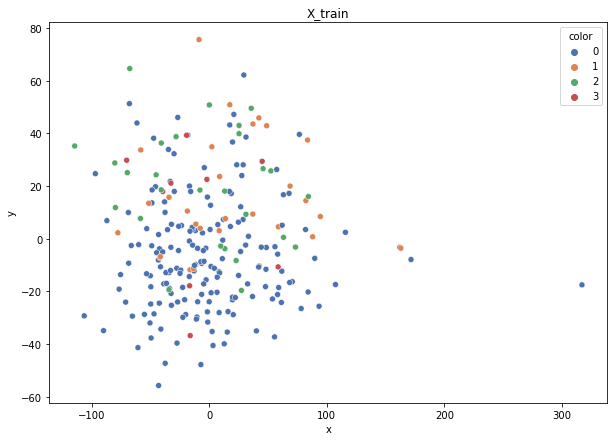

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.229
DT-f1-old-features: 0.295
DT-gmean-GlobalCS: 0.018
DT-gmean-old-features: 0.075
KNN-f1-GlobalCS: 0.257
KNN-f1-old-features: 0.356
KNN-gmean-GlobalCS: 0.019
KNN-gmean-old-features: 0.079
LDA-f1-GlobalCS: 0.457
LDA-f1-old-features: 0.377
LDA-gmean-GlobalCS: 0.47
LDA-gmean-old-features: 0.098
QDA-f1-GlobalCS: 0.23
QDA-f1-old-features: 0.351
QDA-gmean-GlobalCS: 0.019
QDA-gmean-old-features: 0.079
RF24-f1-GlobalCS: 0.33
RF24-f1-old-features: 0.257
RF24-gmean-GlobalCS: 0.079
RF24-gmean-old-features: 0.019


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


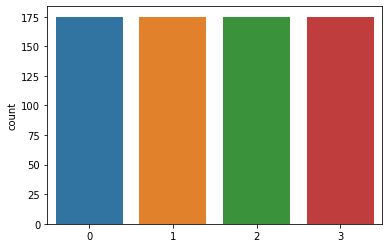

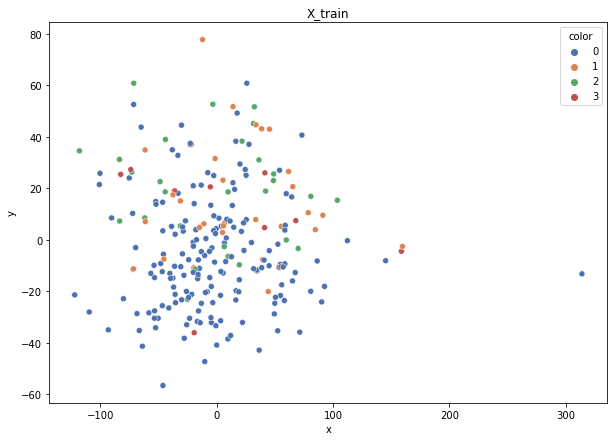

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.224
DT-f1-old-features: 0.238
DT-gmean-GlobalCS: 0.018
DT-gmean-old-features: 0.018
KNN-f1-GlobalCS: 0.353
KNN-f1-old-features: 0.283
KNN-gmean-GlobalCS: 0.027
KNN-gmean-old-features: 0.022
LDA-f1-GlobalCS: 0.432
LDA-f1-old-features: 0.301
LDA-gmean-GlobalCS: 0.113
LDA-gmean-old-features: 0.023
QDA-f1-GlobalCS: 0.082
QDA-f1-old-features: 0.413
QDA-gmean-GlobalCS: 0.041
QDA-gmean-old-features: 0.095
RF24-f1-GlobalCS: 0.391
RF24-f1-old-features: 0.428
RF24-gmean-GlobalCS: 0.094
RF24-gmean-old-features: 0.104


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


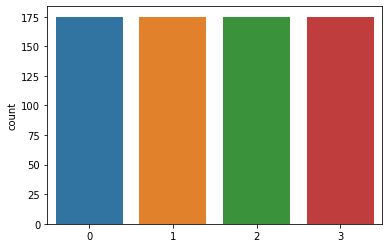

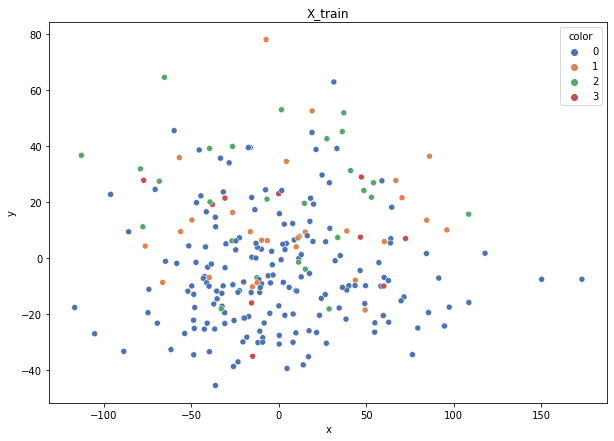

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.333
DT-f1-old-features: 0.335
DT-gmean-GlobalCS: 0.081
DT-gmean-old-features: 0.092
KNN-f1-GlobalCS: 0.334
KNN-f1-old-features: 0.37
KNN-gmean-GlobalCS: 0.081
KNN-gmean-old-features: 0.096
LDA-f1-GlobalCS: 0.405
LDA-f1-old-features: 0.467
LDA-gmean-GlobalCS: 0.443
LDA-gmean-old-features: 0.463
QDA-f1-GlobalCS: 0.209
QDA-f1-old-features: 0.301
QDA-gmean-GlobalCS: 0.006
QDA-gmean-old-features: 0.074
RF24-f1-GlobalCS: 0.355
RF24-f1-old-features: 0.29
RF24-gmean-GlobalCS: 0.025
RF24-gmean-old-features: 0.022
glass


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


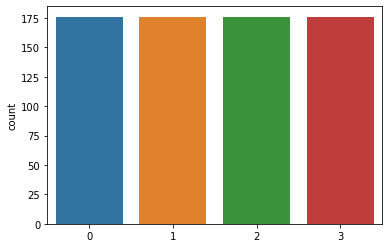

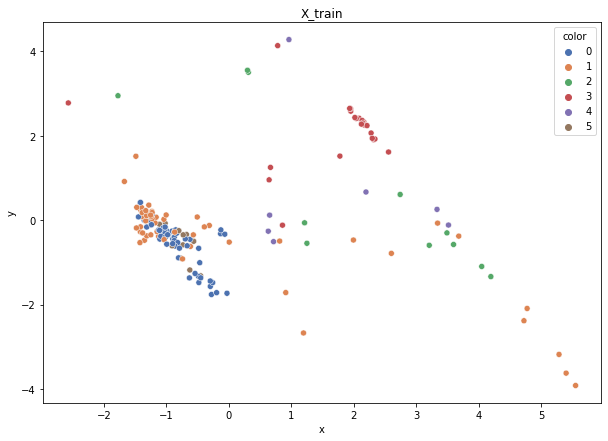

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.713
DT-f1-old-features: 0.711
DT-gmean-GlobalCS: 0.76
DT-gmean-old-features: 0.742
KNN-f1-GlobalCS: 0.747
KNN-f1-old-features: 0.747
KNN-gmean-GlobalCS: 0.701
KNN-gmean-old-features: 0.701
LDA-f1-GlobalCS: 0.499
LDA-f1-old-features: 0.551
LDA-gmean-GlobalCS: 0.207
LDA-gmean-old-features: 0.088
QDA-f1-GlobalCS: 0.385
QDA-f1-old-features: 0.388
QDA-gmean-GlobalCS: 0.064
QDA-gmean-old-features: 0.065
RF24-f1-GlobalCS: 0.835
RF24-f1-old-features: 0.786
RF24-gmean-GlobalCS: 0.867
RF24-gmean-old-features: 0.742


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


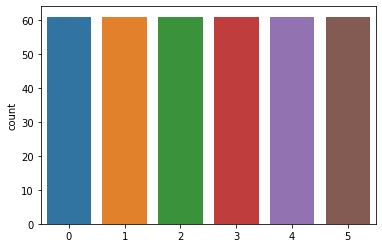

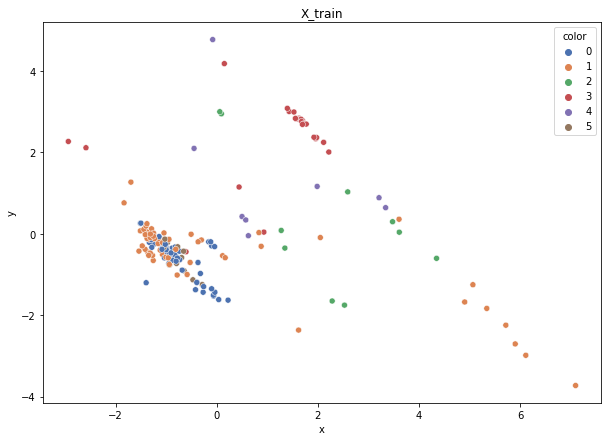

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.553
DT-f1-old-features: 0.53
DT-gmean-GlobalCS: 0.235
DT-gmean-old-features: 0.232
KNN-f1-GlobalCS: 0.568
KNN-f1-old-features: 0.568
KNN-gmean-GlobalCS: 0.557
KNN-gmean-old-features: 0.557
LDA-f1-GlobalCS: 0.445
LDA-f1-old-features: 0.425
LDA-gmean-GlobalCS: 0.19
LDA-gmean-old-features: 0.072
QDA-f1-GlobalCS: 0.369
QDA-f1-old-features: 0.369
QDA-gmean-GlobalCS: 0.06
QDA-gmean-old-features: 0.06
RF24-f1-GlobalCS: 0.691
RF24-f1-old-features: 0.652
RF24-gmean-GlobalCS: 0.681
RF24-gmean-old-features: 0.279


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


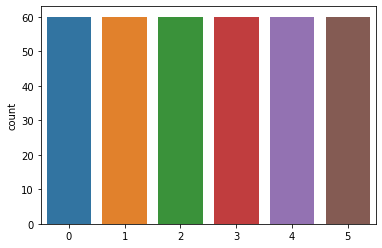

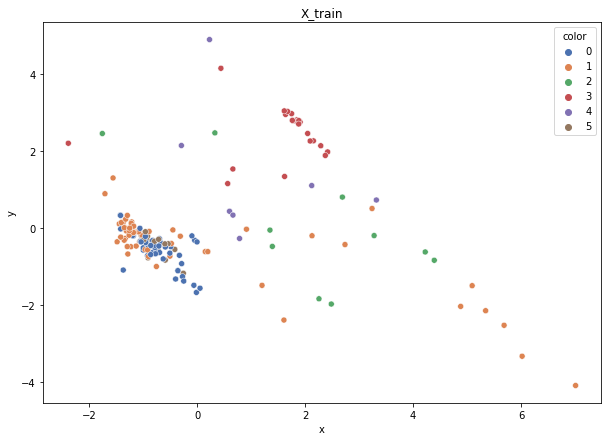

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.64
DT-f1-old-features: 0.607
DT-gmean-GlobalCS: 0.26
DT-gmean-old-features: 0.25
KNN-f1-GlobalCS: 0.661
KNN-f1-old-features: 0.661
KNN-gmean-GlobalCS: 0.246
KNN-gmean-old-features: 0.246
LDA-f1-GlobalCS: 0.594
LDA-f1-old-features: 0.575
LDA-gmean-GlobalCS: 0.602
LDA-gmean-old-features: 0.233
QDA-f1-GlobalCS: 0.565
QDA-f1-old-features: 0.587
QDA-gmean-GlobalCS: 0.501
QDA-gmean-old-features: 0.526
RF24-f1-GlobalCS: 0.654
RF24-f1-old-features: 0.731
RF24-gmean-GlobalCS: 0.273
RF24-gmean-old-features: 0.281


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


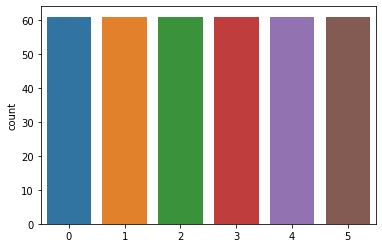

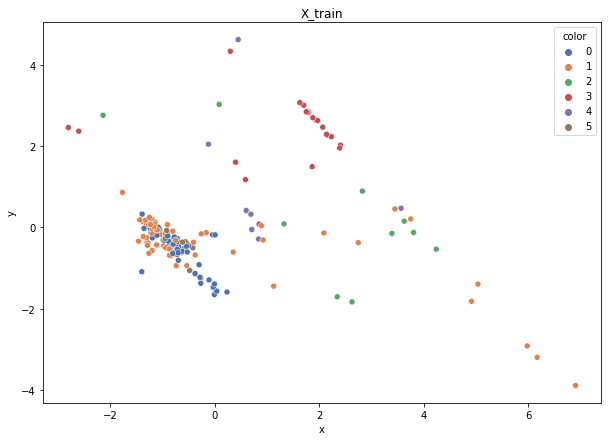

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.563
DT-f1-old-features: 0.646
DT-gmean-GlobalCS: 0.229
DT-gmean-old-features: 0.681
KNN-f1-GlobalCS: 0.641
KNN-f1-old-features: 0.641
KNN-gmean-GlobalCS: 0.587
KNN-gmean-old-features: 0.587
LDA-f1-GlobalCS: 0.629
LDA-f1-old-features: 0.517
LDA-gmean-GlobalCS: 0.651
LDA-gmean-old-features: 0.196
QDA-f1-GlobalCS: 0.015
QDA-f1-old-features: 0.571
QDA-gmean-GlobalCS: 0.003
QDA-gmean-old-features: 0.219
RF24-f1-GlobalCS: 0.769
RF24-f1-old-features: 0.776
RF24-gmean-GlobalCS: 0.748
RF24-gmean-old-features: 0.748


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


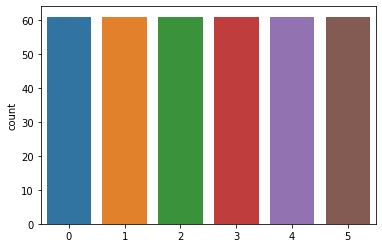

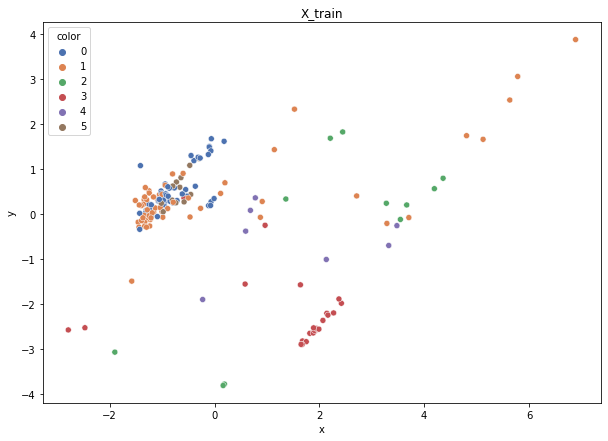

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.715
DT-f1-old-features: 0.73
DT-gmean-GlobalCS: 0.725
DT-gmean-old-features: 0.737
KNN-f1-GlobalCS: 0.678
KNN-f1-old-features: 0.678
KNN-gmean-GlobalCS: 0.681
KNN-gmean-old-features: 0.681
LDA-f1-GlobalCS: 0.618
LDA-f1-old-features: 0.55
LDA-gmean-GlobalCS: 0.663
LDA-gmean-old-features: 0.222
QDA-f1-GlobalCS: 0.609
QDA-f1-old-features: 0.553
QDA-gmean-GlobalCS: 0.251
QDA-gmean-old-features: 0.217
RF24-f1-GlobalCS: 0.84
RF24-f1-old-features: 0.857
RF24-gmean-GlobalCS: 0.851
RF24-gmean-old-features: 0.865
new_ecoli


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


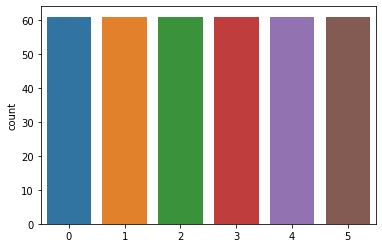

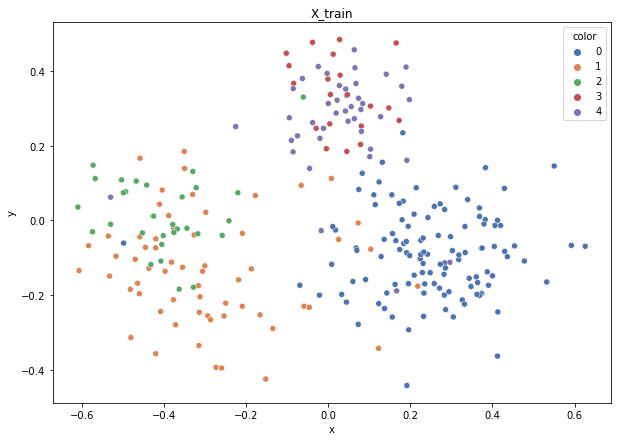

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.711
DT-f1-old-features: 0.634
DT-gmean-GlobalCS: 0.705
DT-gmean-old-features: 0.537
KNN-f1-GlobalCS: 0.749
KNN-f1-old-features: 0.749
KNN-gmean-GlobalCS: 0.719
KNN-gmean-old-features: 0.719
LDA-f1-GlobalCS: 0.812
LDA-f1-old-features: 0.809
LDA-gmean-GlobalCS: 0.836
LDA-gmean-old-features: 0.791
QDA-f1-GlobalCS: 0.248
QDA-f1-old-features: 0.287
QDA-gmean-GlobalCS: 0.091
QDA-gmean-old-features: 0.042
RF24-f1-GlobalCS: 0.8
RF24-f1-old-features: 0.769
RF24-gmean-GlobalCS: 0.802
RF24-gmean-old-features: 0.771


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


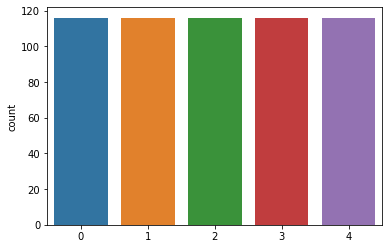

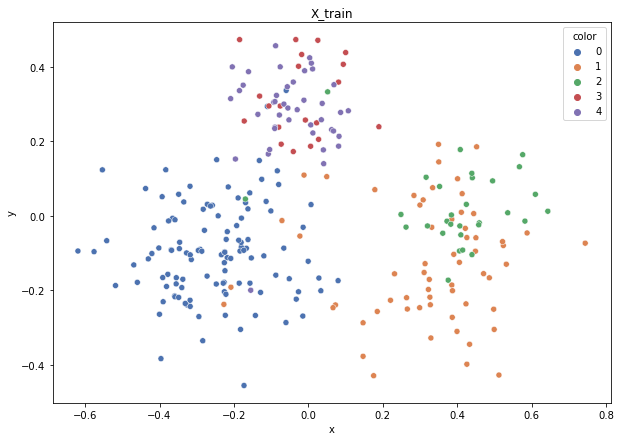

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.765
DT-f1-old-features: 0.707
DT-gmean-GlobalCS: 0.719
DT-gmean-old-features: 0.688
KNN-f1-GlobalCS: 0.728
KNN-f1-old-features: 0.728
KNN-gmean-GlobalCS: 0.709
KNN-gmean-old-features: 0.709
LDA-f1-GlobalCS: 0.818
LDA-f1-old-features: 0.853
LDA-gmean-GlobalCS: 0.817
LDA-gmean-old-features: 0.84
QDA-f1-GlobalCS: 0.412
QDA-f1-old-features: 0.437
QDA-gmean-GlobalCS: 0.14
QDA-gmean-old-features: 0.334
RF24-f1-GlobalCS: 0.792
RF24-f1-old-features: 0.841
RF24-gmean-GlobalCS: 0.764
RF24-gmean-old-features: 0.829


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


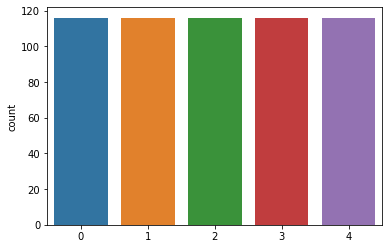

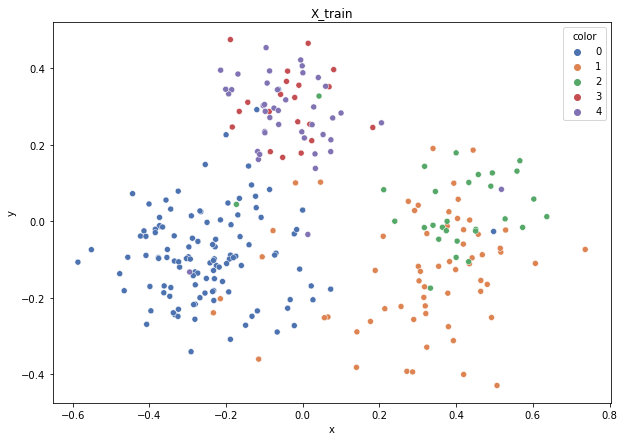

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.726
DT-f1-old-features: 0.722
DT-gmean-GlobalCS: 0.73
DT-gmean-old-features: 0.69
KNN-f1-GlobalCS: 0.862
KNN-f1-old-features: 0.862
KNN-gmean-GlobalCS: 0.815
KNN-gmean-old-features: 0.815
LDA-f1-GlobalCS: 0.89
LDA-f1-old-features: 0.872
LDA-gmean-GlobalCS: 0.897
LDA-gmean-old-features: 0.852
QDA-f1-GlobalCS: 0.093
QDA-f1-old-features: 0.176
QDA-gmean-GlobalCS: 0.019
QDA-gmean-old-features: 0.011
RF24-f1-GlobalCS: 0.875
RF24-f1-old-features: 0.879
RF24-gmean-GlobalCS: 0.853
RF24-gmean-old-features: 0.846


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


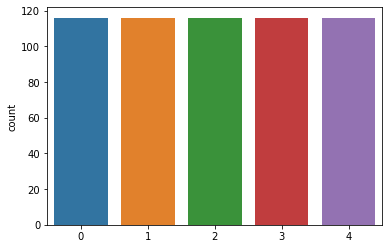

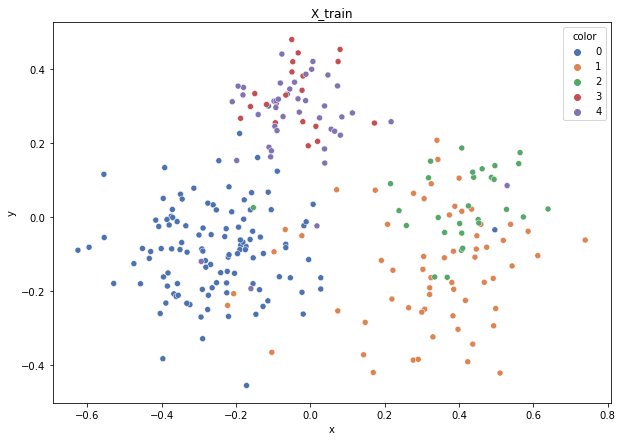

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.693
DT-f1-old-features: 0.649
DT-gmean-GlobalCS: 0.662
DT-gmean-old-features: 0.606
KNN-f1-GlobalCS: 0.817
KNN-f1-old-features: 0.817
KNN-gmean-GlobalCS: 0.782
KNN-gmean-old-features: 0.782
LDA-f1-GlobalCS: 0.815
LDA-f1-old-features: 0.74
LDA-gmean-GlobalCS: 0.827
LDA-gmean-old-features: 0.718
QDA-f1-GlobalCS: 0.223
QDA-f1-old-features: 0.328
QDA-gmean-GlobalCS: 0.042
QDA-gmean-old-features: 0.235
RF24-f1-GlobalCS: 0.758
RF24-f1-old-features: 0.753
RF24-gmean-GlobalCS: 0.736
RF24-gmean-old-features: 0.719


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


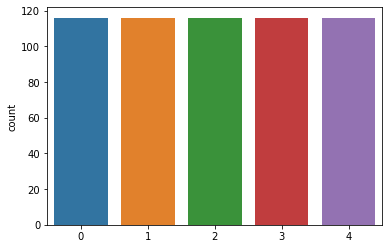

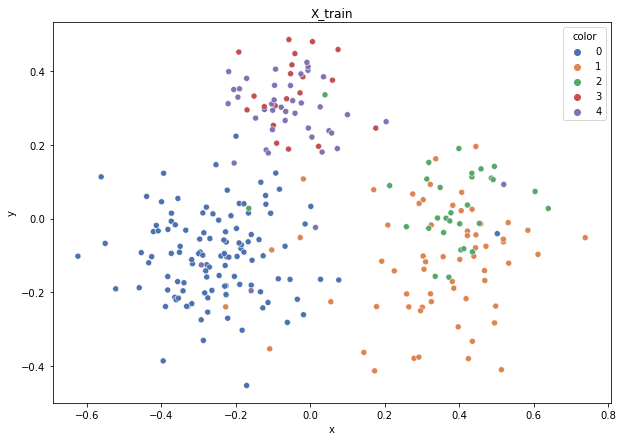

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.803
DT-f1-old-features: 0.793
DT-gmean-GlobalCS: 0.854
DT-gmean-old-features: 0.822
KNN-f1-GlobalCS: 0.808
KNN-f1-old-features: 0.808
KNN-gmean-GlobalCS: 0.84
KNN-gmean-old-features: 0.84
LDA-f1-GlobalCS: 0.921
LDA-f1-old-features: 0.86
LDA-gmean-GlobalCS: 0.95
LDA-gmean-old-features: 0.873
QDA-f1-GlobalCS: 0.439
QDA-f1-old-features: 0.254
QDA-gmean-GlobalCS: 0.152
QDA-gmean-old-features: 0.237
RF24-f1-GlobalCS: 0.894
RF24-f1-old-features: 0.887
RF24-gmean-GlobalCS: 0.902
RF24-gmean-old-features: 0.876
new_led7digit


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


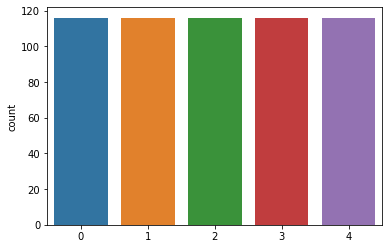

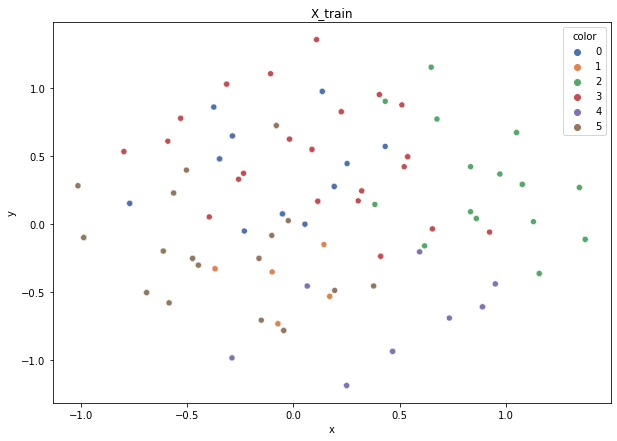

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-GlobalCS: 0.735
DT-f1-old-features: 0.789
DT-gmean-GlobalCS: 0.731
DT-gmean-old-features: 0.797
KNN-f1-GlobalCS: 0.764
KNN-f1-old-features: 0.741
KNN-gmean-GlobalCS: 0.767
KNN-gmean-old-features: 0.719
LDA-f1-GlobalCS: 0.804
LDA-f1-old-features: 0.804
LDA-gmean-GlobalCS: 0.806
LDA-gmean-old-features: 0.806
QDA-f1-GlobalCS: 0.284
QDA-f1-old-features: 0.709
QDA-gmean-GlobalCS: 0.104
QDA-gmean-old-features: 0.689
RF24-f1-GlobalCS: 0.778
RF24-f1-old-features: 0.796
RF24-gmean-GlobalCS: 0.779
RF24-gmean-old-features: 0.797


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


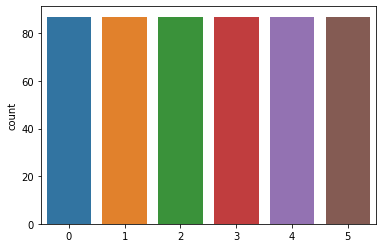

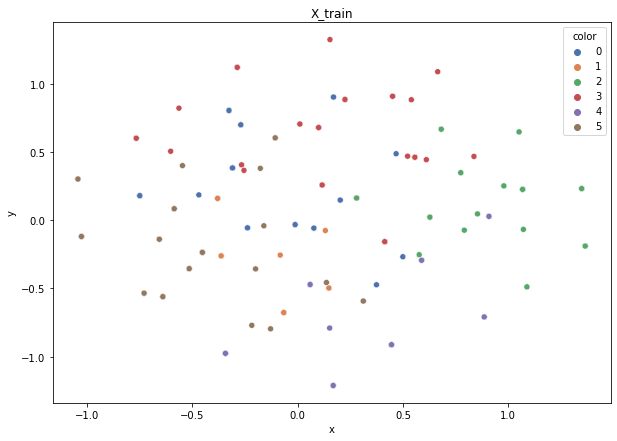

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.759
DT-f1-old-features: 0.779
DT-gmean-GlobalCS: 0.728
DT-gmean-old-features: 0.755
KNN-f1-GlobalCS: 0.612
KNN-f1-old-features: 0.692
KNN-gmean-GlobalCS: 0.47
KNN-gmean-old-features: 0.283
LDA-f1-GlobalCS: 0.756
LDA-f1-old-features: 0.756
LDA-gmean-GlobalCS: 0.729
LDA-gmean-old-features: 0.729
QDA-f1-GlobalCS: 0.736
QDA-f1-old-features: 0.745
QDA-gmean-GlobalCS: 0.686
QDA-gmean-old-features: 0.695
RF24-f1-GlobalCS: 0.743
RF24-f1-old-features: 0.767
RF24-gmean-GlobalCS: 0.701
RF24-gmean-old-features: 0.735


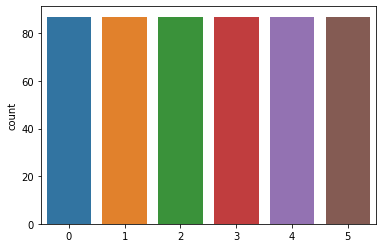

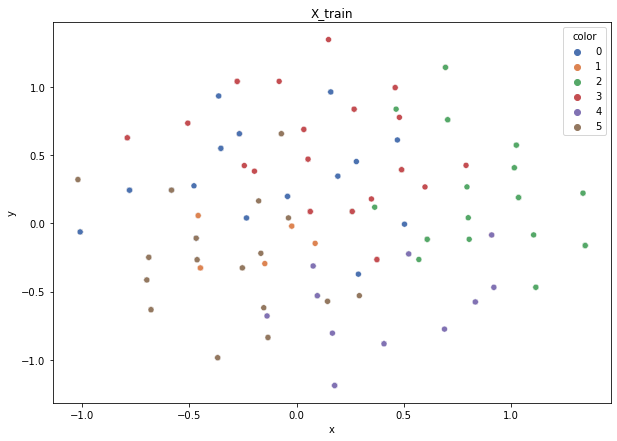

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.79
DT-f1-old-features: 0.782
DT-gmean-GlobalCS: 0.791
DT-gmean-old-features: 0.783
KNN-f1-GlobalCS: 0.711
KNN-f1-old-features: 0.739
KNN-gmean-GlobalCS: 0.6
KNN-gmean-old-features: 0.739
LDA-f1-GlobalCS: 0.824
LDA-f1-old-features: 0.824
LDA-gmean-GlobalCS: 0.824
LDA-gmean-old-features: 0.824
QDA-f1-GlobalCS: 0.796
QDA-f1-old-features: 0.769
QDA-gmean-GlobalCS: 0.793
QDA-gmean-old-features: 0.761
RF24-f1-GlobalCS: 0.797
RF24-f1-old-features: 0.793
RF24-gmean-GlobalCS: 0.799
RF24-gmean-old-features: 0.793


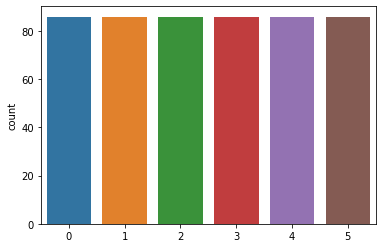

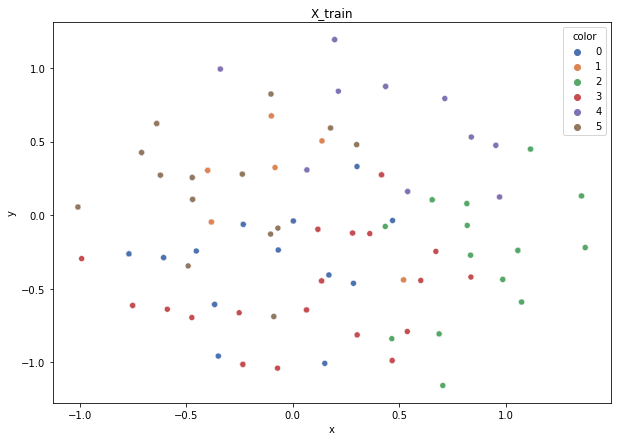

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.73
DT-f1-old-features: 0.716
DT-gmean-GlobalCS: 0.725
DT-gmean-old-features: 0.698
KNN-f1-GlobalCS: 0.681
KNN-f1-old-features: 0.714
KNN-gmean-GlobalCS: 0.674
KNN-gmean-old-features: 0.704
LDA-f1-GlobalCS: 0.784
LDA-f1-old-features: 0.784
LDA-gmean-GlobalCS: 0.777
LDA-gmean-old-features: 0.777
QDA-f1-GlobalCS: 0.722
QDA-f1-old-features: 0.722
QDA-gmean-GlobalCS: 0.704
QDA-gmean-old-features: 0.704
RF24-f1-GlobalCS: 0.753
RF24-f1-old-features: 0.763
RF24-gmean-GlobalCS: 0.743
RF24-gmean-old-features: 0.751


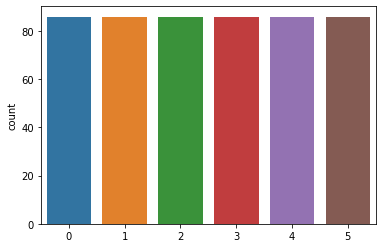

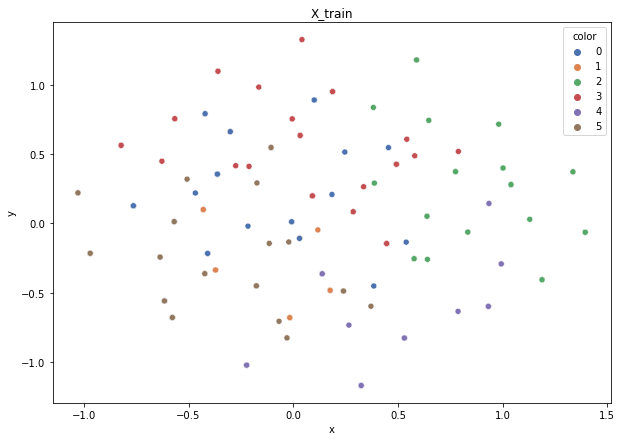

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.785
DT-f1-old-features: 0.802
DT-gmean-GlobalCS: 0.788
DT-gmean-old-features: 0.806
KNN-f1-GlobalCS: 0.76
KNN-f1-old-features: 0.785
KNN-gmean-GlobalCS: 0.761
KNN-gmean-old-features: 0.796
LDA-f1-GlobalCS: 0.81
LDA-f1-old-features: 0.822
LDA-gmean-GlobalCS: 0.813
LDA-gmean-old-features: 0.822
QDA-f1-GlobalCS: 0.808
QDA-f1-old-features: 0.8
QDA-gmean-GlobalCS: 0.804
QDA-gmean-old-features: 0.797
RF24-f1-GlobalCS: 0.802
RF24-f1-old-features: 0.802
RF24-gmean-GlobalCS: 0.806
RF24-gmean-old-features: 0.806
new_winequality-red


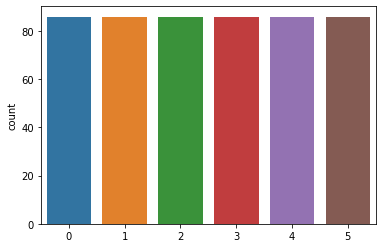

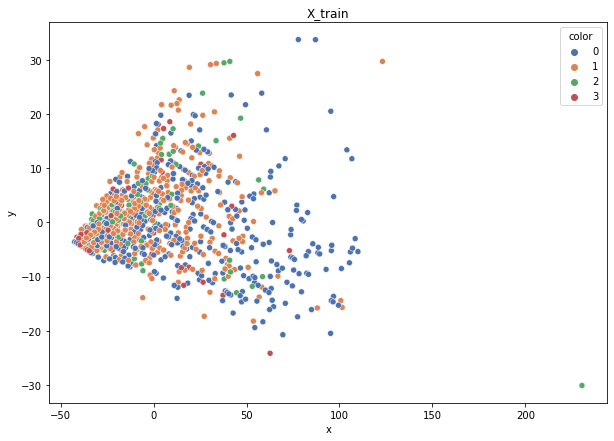

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.513
DT-f1-old-features: 0.503
DT-gmean-GlobalCS: 0.431
DT-gmean-old-features: 0.368
KNN-f1-GlobalCS: 0.555
KNN-f1-old-features: 0.555
KNN-gmean-GlobalCS: 0.487
KNN-gmean-old-features: 0.487
LDA-f1-GlobalCS: 0.378
LDA-f1-old-features: 0.458
LDA-gmean-GlobalCS: 0.397
LDA-gmean-old-features: 0.328
QDA-f1-GlobalCS: 0.411
QDA-f1-old-features: 0.403
QDA-gmean-GlobalCS: 0.426
QDA-gmean-old-features: 0.111
RF24-f1-GlobalCS: 0.591
RF24-f1-old-features: 0.581
RF24-gmean-GlobalCS: 0.479
RF24-gmean-old-features: 0.402


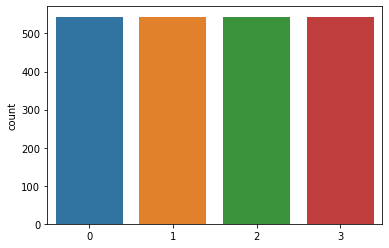

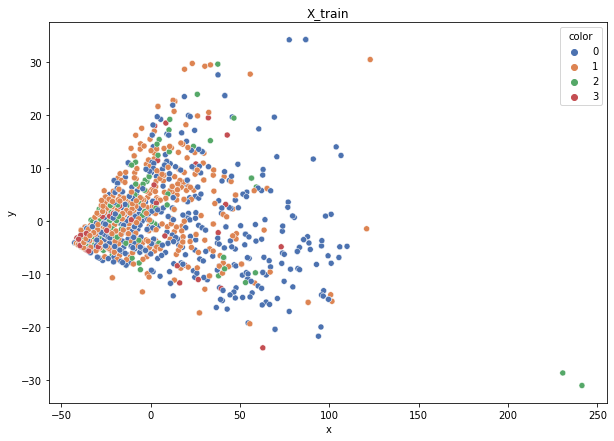

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.532
DT-f1-old-features: 0.505
DT-gmean-GlobalCS: 0.46
DT-gmean-old-features: 0.48
KNN-f1-GlobalCS: 0.555
KNN-f1-old-features: 0.555
KNN-gmean-GlobalCS: 0.512
KNN-gmean-old-features: 0.512
LDA-f1-GlobalCS: 0.465
LDA-f1-old-features: 0.453
LDA-gmean-GlobalCS: 0.49
LDA-gmean-old-features: 0.348
QDA-f1-GlobalCS: 0.434
QDA-f1-old-features: 0.478
QDA-gmean-GlobalCS: 0.458
QDA-gmean-old-features: 0.421
RF24-f1-GlobalCS: 0.573
RF24-f1-old-features: 0.558
RF24-gmean-GlobalCS: 0.494
RF24-gmean-old-features: 0.439


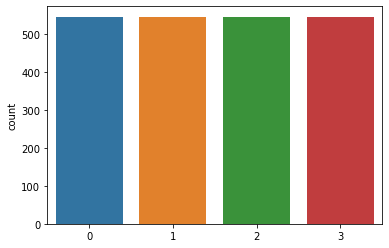

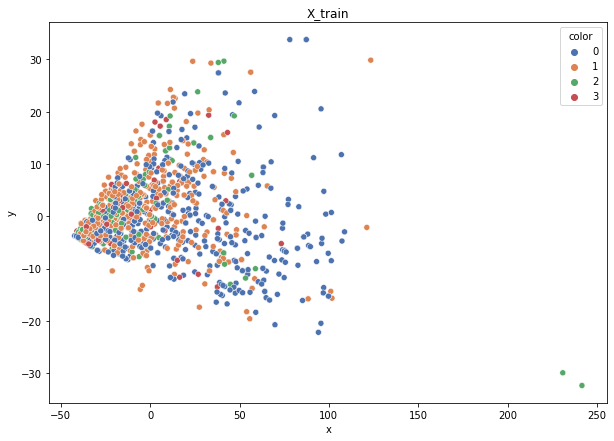

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.495
DT-f1-old-features: 0.514
DT-gmean-GlobalCS: 0.454
DT-gmean-old-features: 0.468
KNN-f1-GlobalCS: 0.544
KNN-f1-old-features: 0.544
KNN-gmean-GlobalCS: 0.516
KNN-gmean-old-features: 0.516
LDA-f1-GlobalCS: 0.413
LDA-f1-old-features: 0.445
LDA-gmean-GlobalCS: 0.469
LDA-gmean-old-features: 0.321
QDA-f1-GlobalCS: 0.382
QDA-f1-old-features: 0.42
QDA-gmean-GlobalCS: 0.412
QDA-gmean-old-features: 0.306
RF24-f1-GlobalCS: 0.511
RF24-f1-old-features: 0.515
RF24-gmean-GlobalCS: 0.375
RF24-gmean-old-features: 0.138


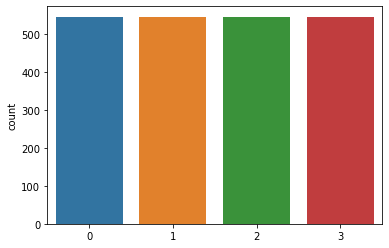

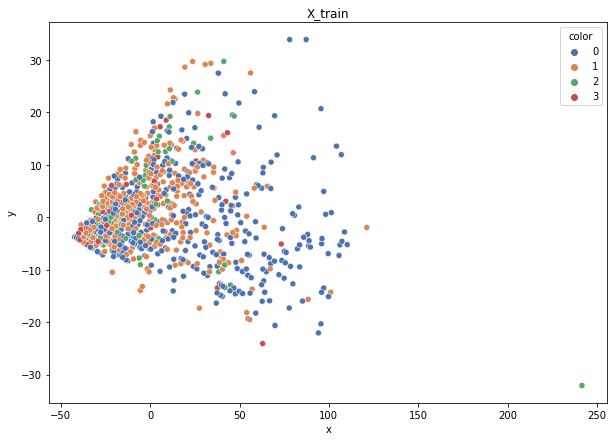

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.462
DT-f1-old-features: 0.427
DT-gmean-GlobalCS: 0.413
DT-gmean-old-features: 0.378
KNN-f1-GlobalCS: 0.486
KNN-f1-old-features: 0.486
KNN-gmean-GlobalCS: 0.421
KNN-gmean-old-features: 0.421
LDA-f1-GlobalCS: 0.4
LDA-f1-old-features: 0.411
LDA-gmean-GlobalCS: 0.439
LDA-gmean-old-features: 0.11
QDA-f1-GlobalCS: 0.35
QDA-f1-old-features: 0.418
QDA-gmean-GlobalCS: 0.356
QDA-gmean-old-features: 0.361
RF24-f1-GlobalCS: 0.508
RF24-f1-old-features: 0.513
RF24-gmean-GlobalCS: 0.413
RF24-gmean-old-features: 0.401


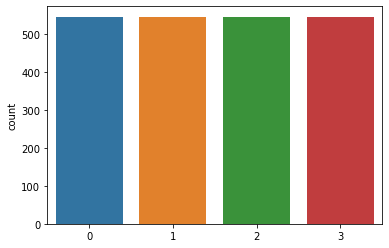

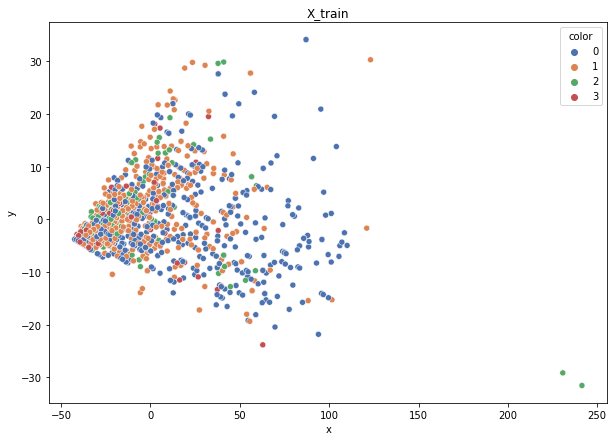

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.489
DT-f1-old-features: 0.463
DT-gmean-GlobalCS: 0.357
DT-gmean-old-features: 0.399
KNN-f1-GlobalCS: 0.537
KNN-f1-old-features: 0.537
KNN-gmean-GlobalCS: 0.437
KNN-gmean-old-features: 0.437
LDA-f1-GlobalCS: 0.448
LDA-f1-old-features: 0.512
LDA-gmean-GlobalCS: 0.494
LDA-gmean-old-features: 0.431
QDA-f1-GlobalCS: 0.457
QDA-f1-old-features: 0.512
QDA-gmean-GlobalCS: 0.493
QDA-gmean-old-features: 0.449
RF24-f1-GlobalCS: 0.611
RF24-f1-old-features: 0.608
RF24-gmean-GlobalCS: 0.533
RF24-gmean-old-features: 0.472
thyroid-newthyroid


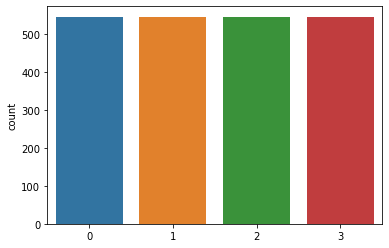

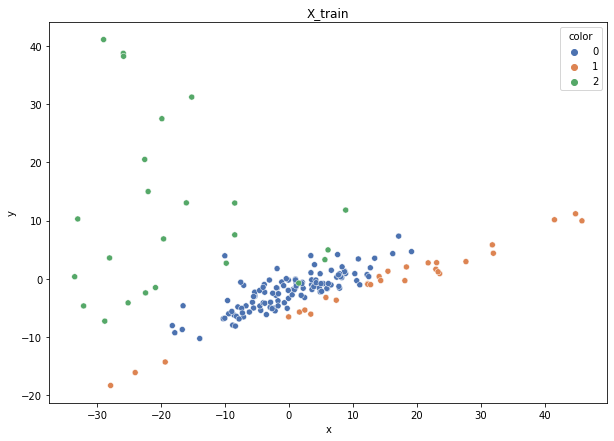

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.902
DT-f1-old-features: 0.902
DT-gmean-GlobalCS: 0.884
DT-gmean-old-features: 0.884
KNN-f1-GlobalCS: 0.964
KNN-f1-old-features: 0.964
KNN-gmean-GlobalCS: 0.941
KNN-gmean-old-features: 0.941
LDA-f1-GlobalCS: 0.934
LDA-f1-old-features: 0.898
LDA-gmean-GlobalCS: 0.894
LDA-gmean-old-features: 0.841
QDA-f1-GlobalCS: 0.964
QDA-f1-old-features: 0.964
QDA-gmean-GlobalCS: 0.941
QDA-gmean-old-features: 0.941
RF24-f1-GlobalCS: 1.0
RF24-f1-old-features: 0.933
RF24-gmean-GlobalCS: 1.0
RF24-gmean-old-features: 0.894


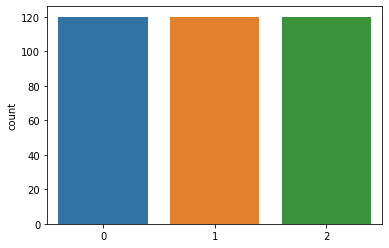

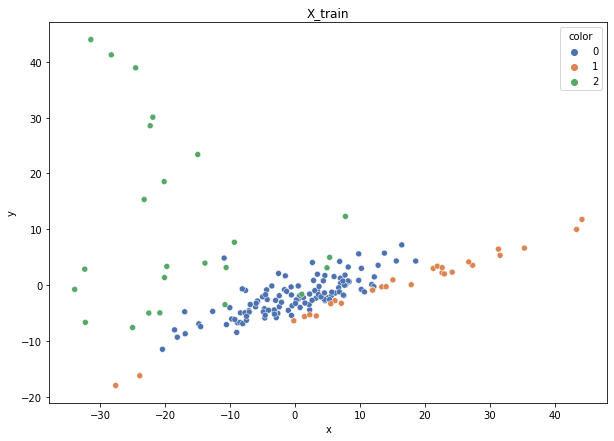

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.916
DT-f1-old-features: 0.947
DT-gmean-GlobalCS: 0.928
DT-gmean-old-features: 0.977
KNN-f1-GlobalCS: 0.972
KNN-f1-old-features: 0.972
KNN-gmean-GlobalCS: 0.989
KNN-gmean-old-features: 0.989
LDA-f1-GlobalCS: 0.941
LDA-f1-old-features: 0.933
LDA-gmean-GlobalCS: 0.939
LDA-gmean-old-features: 0.894
QDA-f1-GlobalCS: 0.969
QDA-f1-old-features: 0.969
QDA-gmean-GlobalCS: 0.989
QDA-gmean-old-features: 0.989
RF24-f1-GlobalCS: 0.972
RF24-f1-old-features: 0.969
RF24-gmean-GlobalCS: 0.989
RF24-gmean-old-features: 0.95


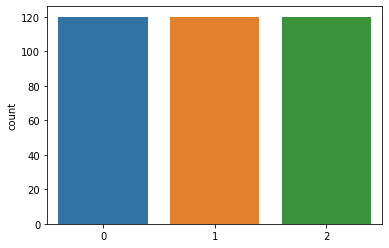

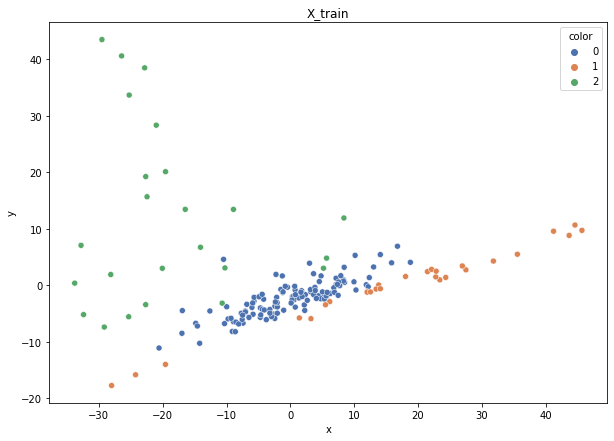

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.867
DT-f1-old-features: 0.905
DT-gmean-GlobalCS: 0.832
DT-gmean-old-features: 0.92
KNN-f1-GlobalCS: 0.902
KNN-f1-old-features: 0.902
KNN-gmean-GlobalCS: 0.884
KNN-gmean-old-features: 0.884
LDA-f1-GlobalCS: 0.933
LDA-f1-old-features: 0.817
LDA-gmean-GlobalCS: 0.894
LDA-gmean-old-features: 0.725
QDA-f1-GlobalCS: 0.936
QDA-f1-old-features: 0.936
QDA-gmean-GlobalCS: 0.93
QDA-gmean-old-features: 0.93
RF24-f1-GlobalCS: 0.936
RF24-f1-old-features: 0.933
RF24-gmean-GlobalCS: 0.93
RF24-gmean-old-features: 0.894


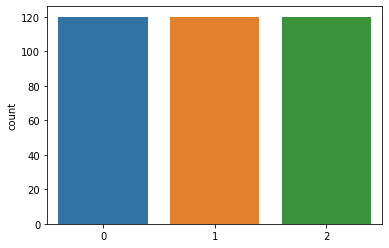

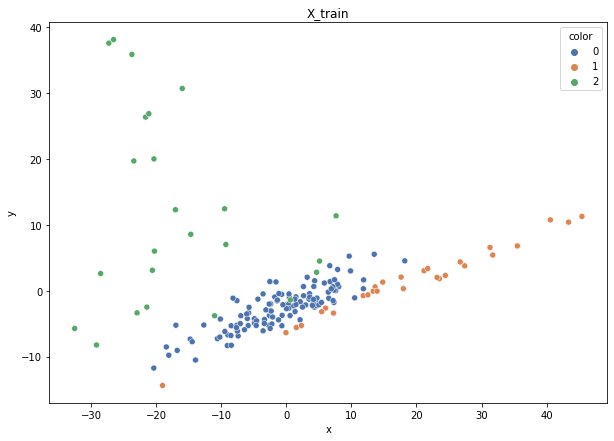

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.902
DT-f1-old-features: 0.902
DT-gmean-GlobalCS: 0.884
DT-gmean-old-features: 0.884
KNN-f1-GlobalCS: 0.941
KNN-f1-old-features: 0.941
KNN-gmean-GlobalCS: 0.977
KNN-gmean-old-features: 0.977
LDA-f1-GlobalCS: 0.906
LDA-f1-old-features: 0.898
LDA-gmean-GlobalCS: 0.884
LDA-gmean-old-features: 0.841
QDA-f1-GlobalCS: 0.941
QDA-f1-old-features: 0.969
QDA-gmean-GlobalCS: 0.977
QDA-gmean-old-features: 0.989
RF24-f1-GlobalCS: 0.902
RF24-f1-old-features: 0.902
RF24-gmean-GlobalCS: 0.884
RF24-gmean-old-features: 0.884


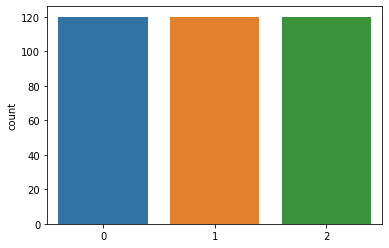

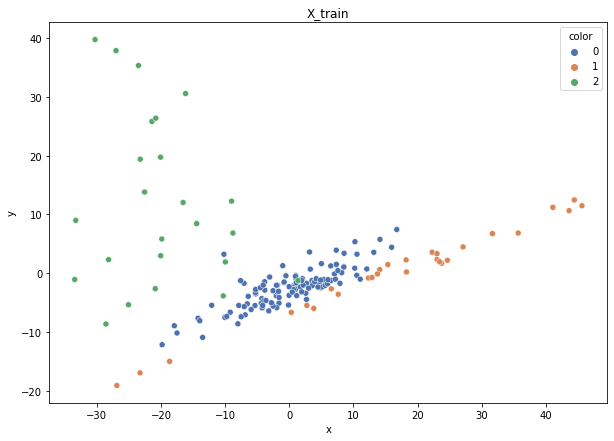

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


DT-f1-GlobalCS: 0.893
DT-f1-old-features: 0.893
DT-gmean-GlobalCS: 0.864
DT-gmean-old-features: 0.864
KNN-f1-GlobalCS: 0.873
KNN-f1-old-features: 0.873
KNN-gmean-GlobalCS: 0.794
KNN-gmean-old-features: 0.794
LDA-f1-GlobalCS: 0.808
LDA-f1-old-features: 0.721
LDA-gmean-GlobalCS: 0.709
LDA-gmean-old-features: 0.598
QDA-f1-GlobalCS: 0.895
QDA-f1-old-features: 0.895
QDA-gmean-GlobalCS: 0.864
QDA-gmean-old-features: 0.864
RF24-f1-GlobalCS: 0.893
RF24-f1-old-features: 0.923
RF24-gmean-GlobalCS: 0.864
RF24-gmean-old-features: 0.874


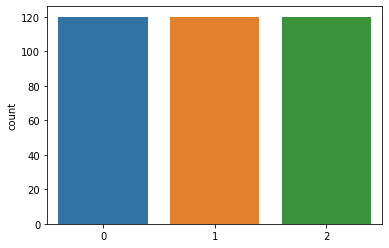

In [8]:
result_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)
        y_train, y_test = y[train_index], y[test_index]
        
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)
        
        clf = GlobalCS()
        X_oversample, y_oversample = clf.fit_resample(X_train_enc, y_train)
        
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        sns.countplot(y_oversample)
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_norm, y_train)
            preds = clf.predict(X_test_norm)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_oversample, y_oversample)
            preds = clf.predict(X_test_enc)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-GlobalCS"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-GlobalCS"].append(gmean)
        
        
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))


In [9]:
results_df = pd.DataFrame.from_dict(result_dict)

In [10]:
results_df

dataset  RF24-f1-old-features  RF24-gmean-old-features  \
0                      cmc              0.514118                 0.512655   
1              dermatology              0.964200                 0.962295   
2               hayes-roth              0.852497                 0.841131   
3              new_vehicle              0.957161                 0.962521   
4                new_yeast              0.562953                 0.338100   
5              1czysty-cut              0.934189                 0.938694   
6           2delikatne-cut              0.761136                 0.756883   
7             3mocniej-cut              0.560931                 0.519703   
8   4delikatne-bezover-cut              0.820201                 0.835313   
9            balance-scale              0.593905                 0.092184   
10               cleveland              0.348918                 0.167176   
11            cleveland_v2              0.355872                 0.070277   
12                   glass              0.760230                 0.582857   
13               new_ecoli              0.825791                 0.808027   
14           new_led7digit              0.784222                 0.776312   
15     new_winequality-red              0.554984                 0.370500   
16      thyroid-newthyroid              0.932098                 0.899032   

    DT-f1-old-features  DT-gmean-old-features  KNN-f1-old-features  \
0             0.467266               0.470278             0.422592   
1             0.949703               0.951222             0.937131   
2             0.851208               0.838449             0.672362   
3             0.896672               0.898498             0.912321   
4             0.442388               0.282887             0.486925   
5             0.935490               0.936512             0.945528   
6             0.724198               0.737376             0.699865   
7             0.504810               0.502048             0.508642   
8             0.796105               0.813035             0.767612   
9             0.605016               0.416495             0.560676   
10            0.289386               0.093840             0.296919   
11            0.341885               0.166359             0.327489   
12            0.644750               0.528347             0.658855   
13            0.700882               0.668764             0.792720   
14            0.773660               0.768158             0.734054   
15            0.482335               0.418683             0.535383   
16            0.909926               0.905678             0.930486   

    KNN-gmean-old-features  QDA-f1-old-features  QDA-gmean-old-features  \
0                 0.412867             0.508046                0.519498   
1                 0.932309             0.777500                0.747057   
2                 0.636136             0.637542                0.633175   
3                 0.912341             0.969460                0.973731   
4                 0.408416             0.162656                0.056409   
5                 0.943824             0.814045                0.716022   
6                 0.678350             0.658847                0.514531   
7                 0.457700             0.274510                0.010000   
8                 0.760887             0.793653                0.717321   
9                 0.089082             0.857046                0.916265   
10                0.078191             0.329814                0.091601   
11                0.065162             0.371311                0.090137   
12                0.554413             0.493787                0.217371   
13                0.773311             0.296550                0.171755   
14                0.648262             0.749035                0.728917   
15                0.474876             0.446237                0.329532   
16                0.916925             0.946546                0.942558   

    LDA-f1-old-featu

In [11]:
results_df.filter(regex=("dataset|RF24-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [12]:
results_df.filter(regex=("dataset|RF24-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [13]:
results_df.filter(regex=("dataset|DT-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [14]:
results_df.filter(regex=("dataset|DT-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [15]:
results_df.filter(regex=("dataset|KNN-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [16]:
results_df.filter(regex=("dataset|KNN-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [17]:
results_df.filter(regex=("dataset|QDA-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [18]:
results_df.filter(regex=("dataset|QDA-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [19]:
results_df.filter(regex=("dataset|LDA-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [20]:
results_df.filter(regex=("dataset|LDA-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [21]:
results_df.filter(regex=("dataset|.*f1-GlobalCS*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [22]:
results_df.filter(regex=("dataset|.*gmean-GlobalCS*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [23]:
def highlight_max(s):
    is_min = s == s.values[1:].max()
      
    return ['font-weight: bold' if cell else '' 
            for cell in is_min]